# PROBLEM STATEMENT AND BUSINESS CASE

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# IMPORT LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from plotnine import *

In [2]:
df = pd.read_csv('Marketing_data.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [ ]:
######## Explanations ###################
# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- there is only one categorical variable with cust_id. All others are numerical

In [4]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- we will have to check the missing data.

array([[<Axes: title={'center': 'BALANCE'}>,
        <Axes: title={'center': 'BALANCE_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES'}>,
        <Axes: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <Axes: title={'center': 'CASH_ADVANCE'}>,
        <Axes: title={'center': 'PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>,
        <Axes: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>],
       [<Axes: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <Axes: title={'center': 'CASH_ADVANCE_TRX'}>,
        <Axes: title={'center': 'PURCHASES_TRX'}>,
        <Axes: title={'center': 'CREDIT_LIMIT'}>,
        <Axes: title={'center': 'PAYMENTS'}>,
        <Axes: title={'center': 'MINIMUM_PAYMENTS'}>,
        <Axes: title={'center': 'PRC_FULL_PAYMENT'}>,
        <Axes: title={'center': 'TENURE'}>, <Axes: >]], dtype=object)

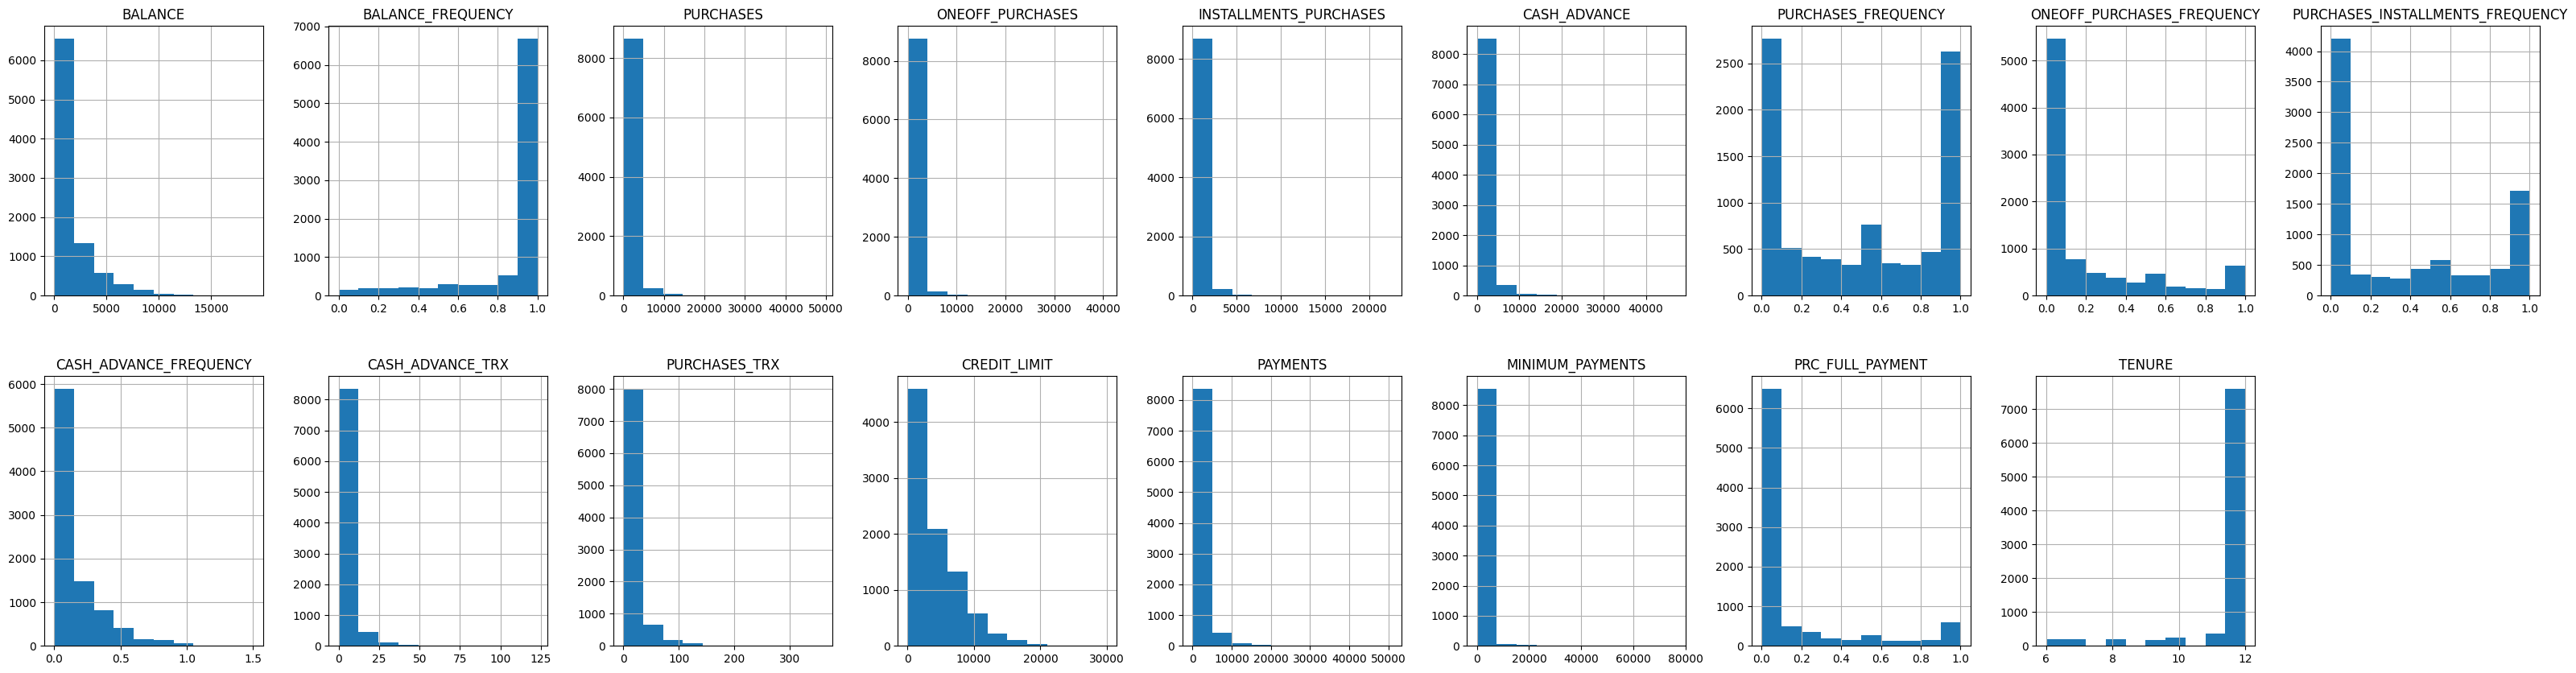

In [5]:
df.hist(layout=(2,9), figsize=(40,10))

- All variables have a range of values (no constant)
- Purchases and Payments seem quite similar. Should be checked with correlation analysis

In [6]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [7]:
# Mean balance is $1564 
# Balance frequency is frequently updated on average ~0.9
# Purchases average is $1000
# one off purchase average is ~$600
# Average purchases frequency is around 0.5
# average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low
# Average credit limit ~ 4500
# Percent of full payment is 15%
# Average tenure is 11 years

In [8]:
# Let's see who made one off purchase of $40761!
df[df.ONEOFF_PURCHASES==df.ONEOFF_PURCHASES.max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [9]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full
df[df.CASH_ADVANCE==df.CASH_ADVANCE.max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

# VISUALIZE AND EXPLORE DATASET

In [10]:
# Let's deal with missing data!
df[df.CREDIT_LIMIT.isna()]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

- it seems a dormant customer or a customer who used the card only once with small cash advance. never made a purchase. Let's set the credit limit to the mean

In [11]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean(), inplace=True)

/var/folders/km/mq2d28q535n4074lxnctcm300000gn/T/ipykernel_25265/1327862684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [12]:
df[df.MINIMUM_PAYMENTS.isna()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00           1499.00   
45    C10047  2242.311686           1.000000     437.00             97.00   
47    C10049  3910.111237           1.000000       0.00              0.00   
54    C10056     6.660517           0.636364     310.00              0.00   
55    C10057  1311.995984           1.000000    1283.90           1283.90   
...      ...          ...                ...        ...               ...   
8919  C19160    14.524779           0.333333     152.00            152.00   
8929  C19170   371.527312           0.333333       0.00              0.00   
8935  C19176   183.817004           1.000000     465.90              0.00   
8944  C19185   193.571722           0.833333    1012.73           1012.73   
8946  C19187    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN          

- Many seem having done No payment with Card so minimum payment could be safely set to zero for those.

In [13]:
df.loc[(df.MINIMUM_PAYMENTS.isnull()==True) & (df.PAYMENTS==0), 'MINIMUM_PAYMENTS'] = 0

In [14]:
# Fill up the remaining missing elements with mean of the 'MINIMUM_PAYMENT' 
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(), inplace=True)

/var/folders/km/mq2d28q535n4074lxnctcm300000gn/T/ipykernel_25265/2267824891.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [15]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [16]:
# Let's see if we have duplicated entries in the data
df.duplicated().sum()

0

In [17]:
# Let's drop Customer ID since it has no meaning here 
df.drop('CUST_ID', inplace=True, axis=1)

In [18]:
len(df.columns)

17

In [19]:
features = df.columns
features

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/var/folders/km/mq2d28q535n4074lxnctcm300000gn/T/ipykernel_25265/117580281.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/var/folders/km/mq2d28q535n4074lxnctcm300000gn/T/ipykernel_25265/117580281.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

/var/folders/km/mq2d28q535n4074lxnctcm300000gn/T/ipykernel_25265/1175802

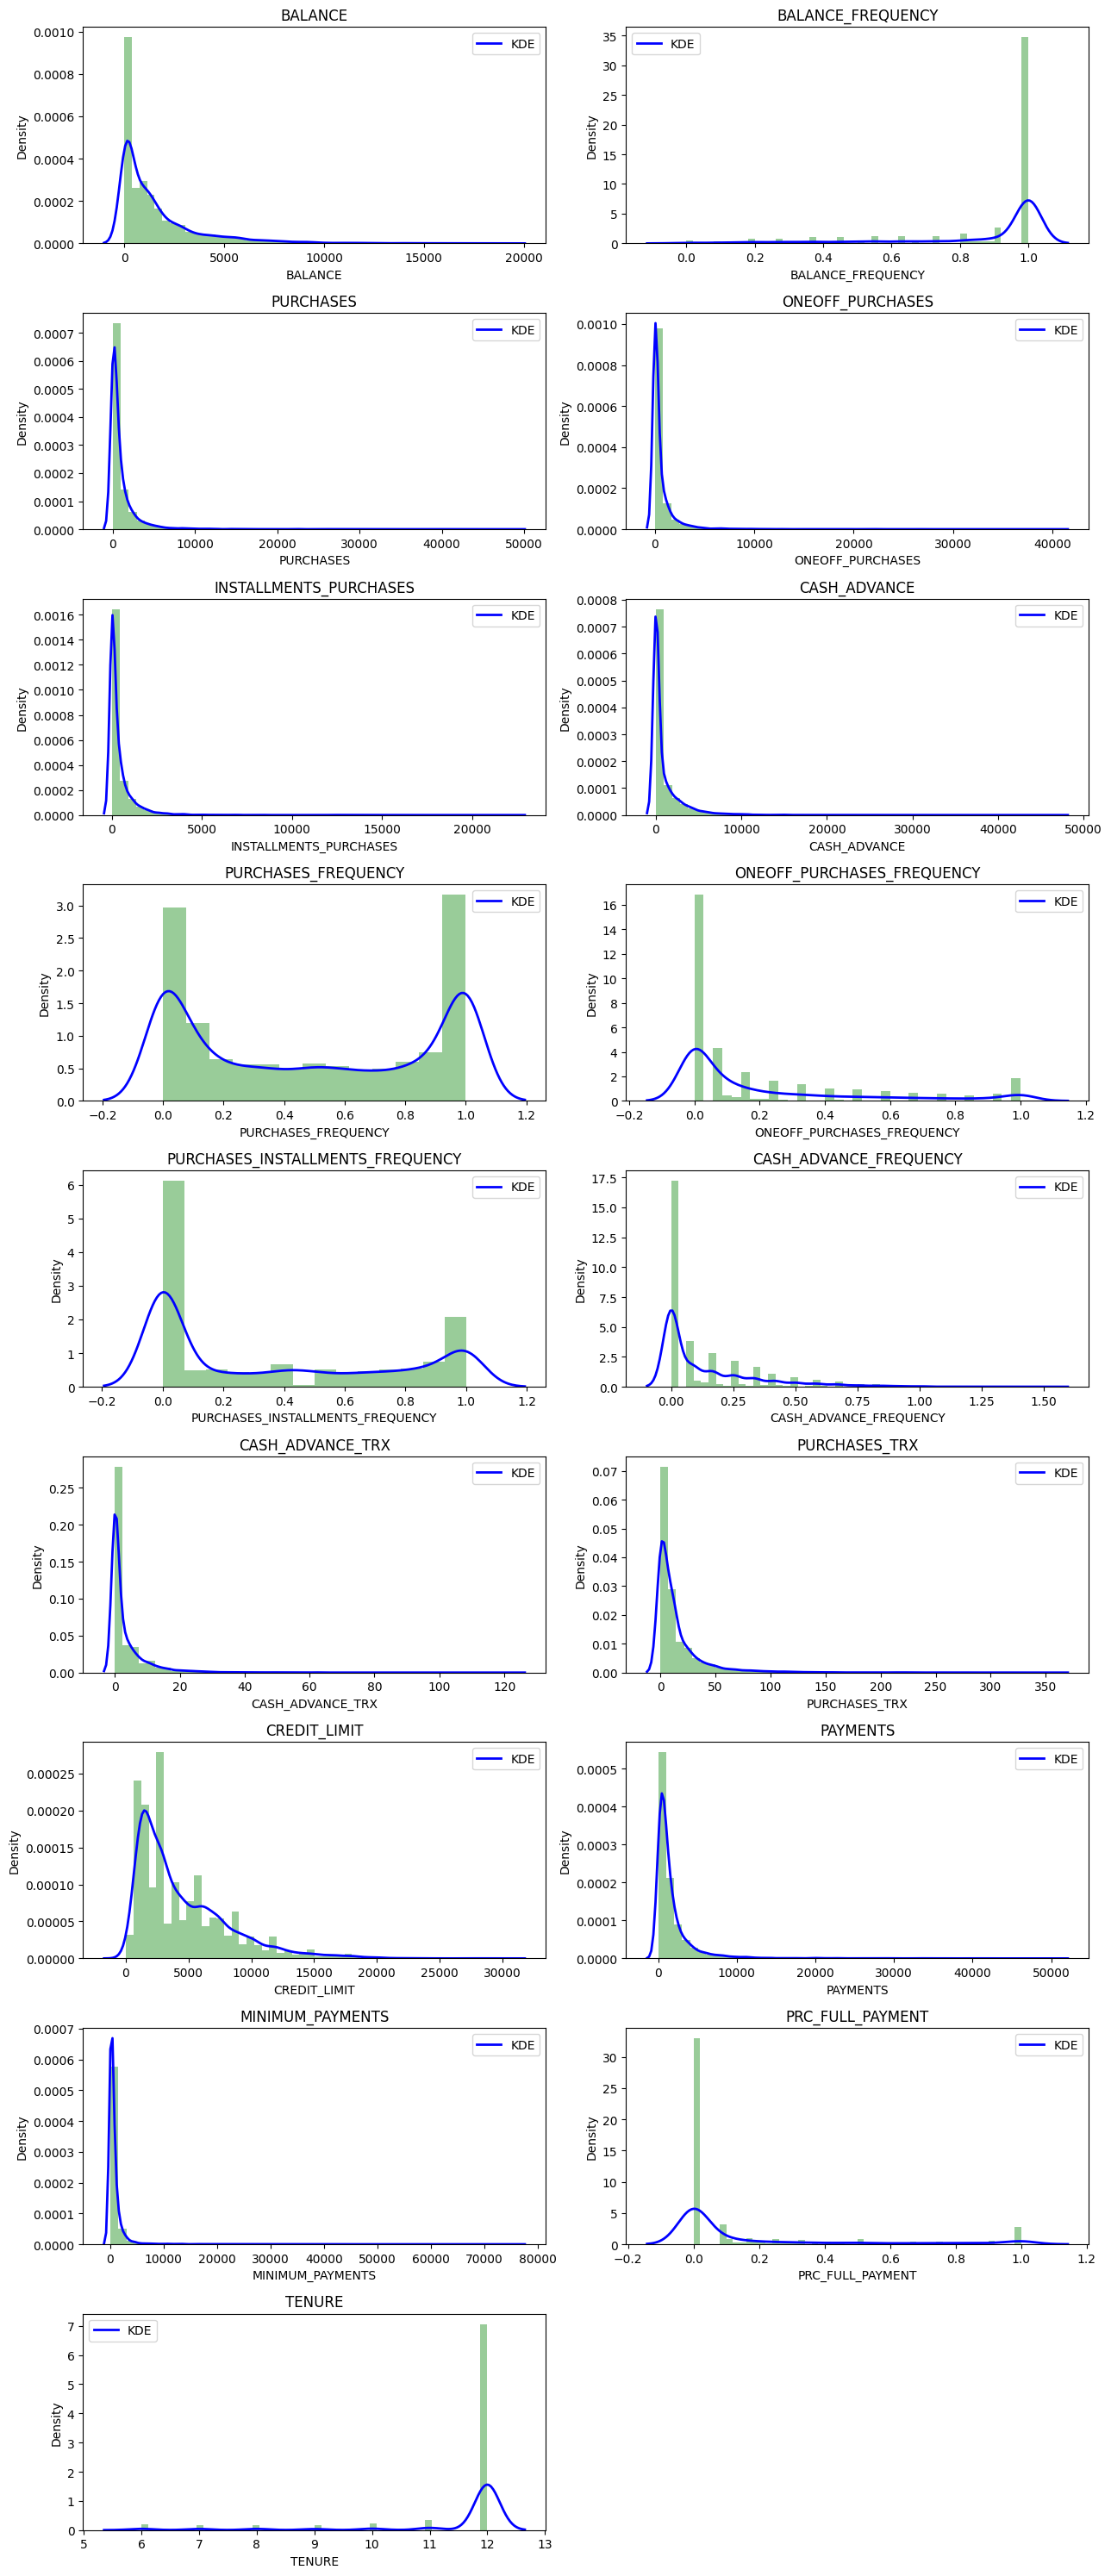

In [20]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable.

plt.figure(figsize=(13,30))
for i in range(len(df.columns)):
  plt.subplot(len(df.columns)//2+1,2,i+1)
  sns.distplot(df[df.columns[i]], hist_kws={'color':'g'}, kde_kws={'color':'b', 'lw':2, 'label':'KDE'})
  plt.title(df.columns[i])
  plt.legend()
plt.tight_layout()

In [39]:
# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

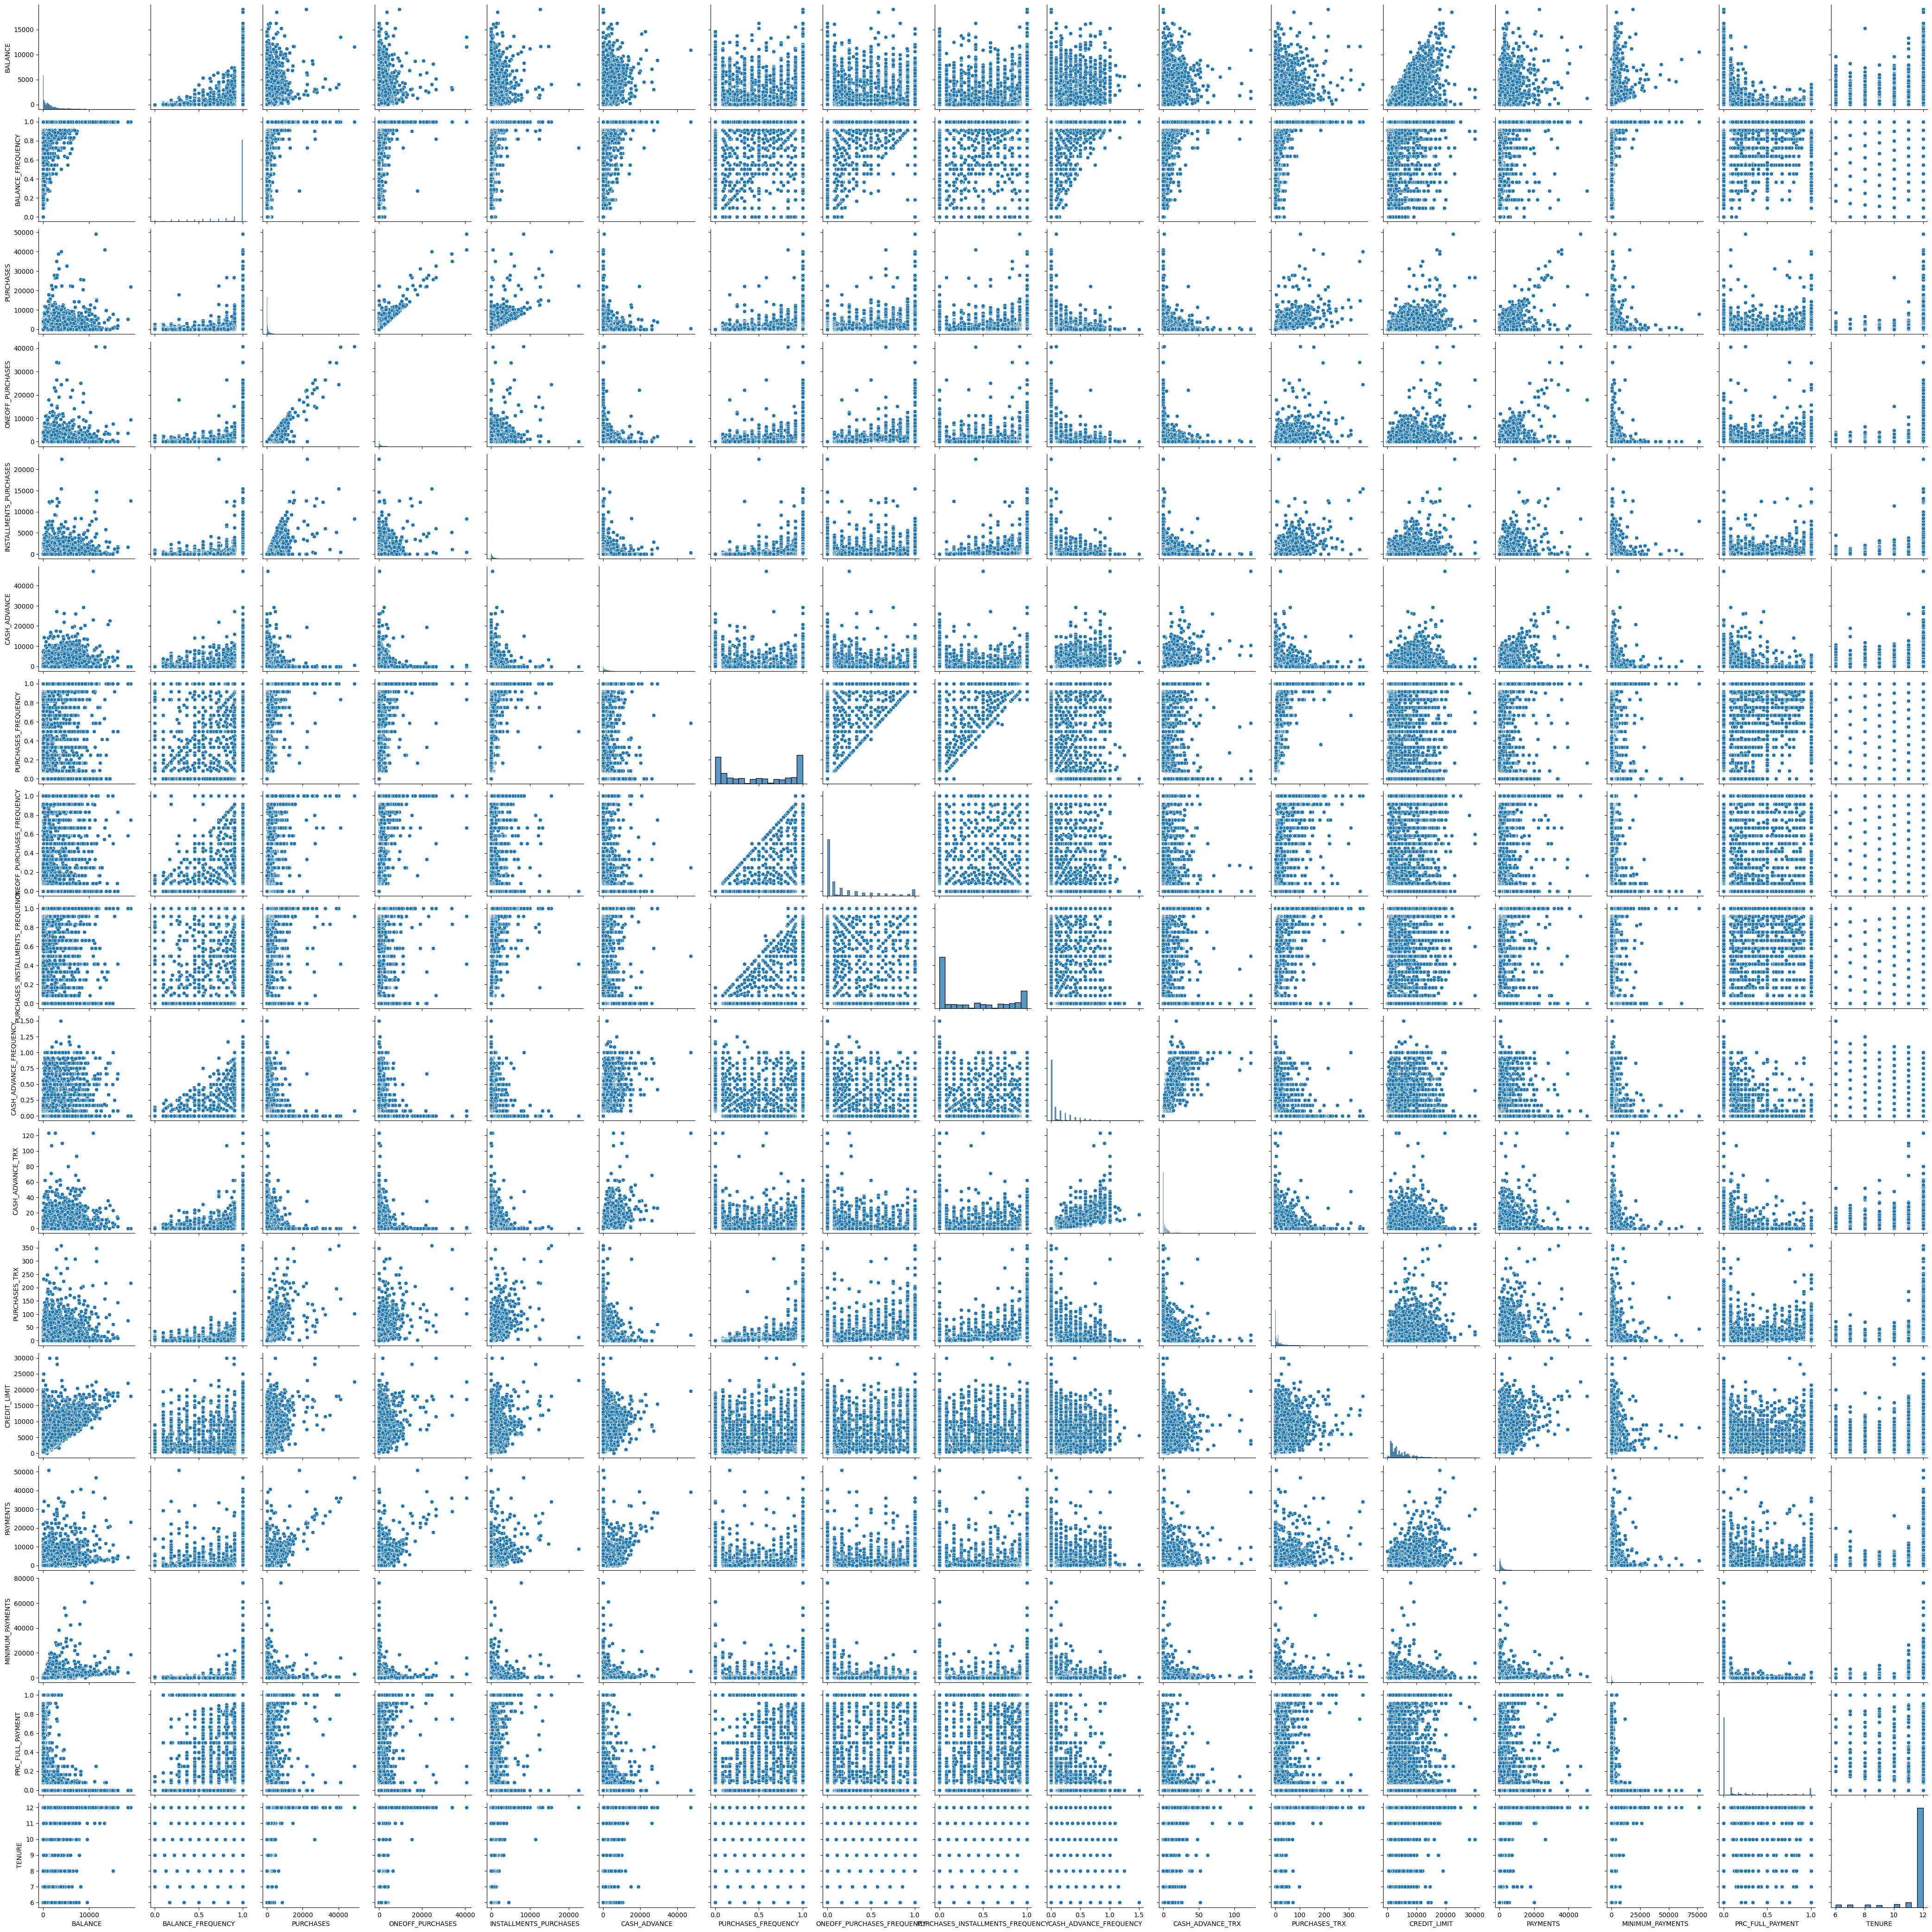

In [21]:
sns.pairplot(df)

In [22]:
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

<Axes: >

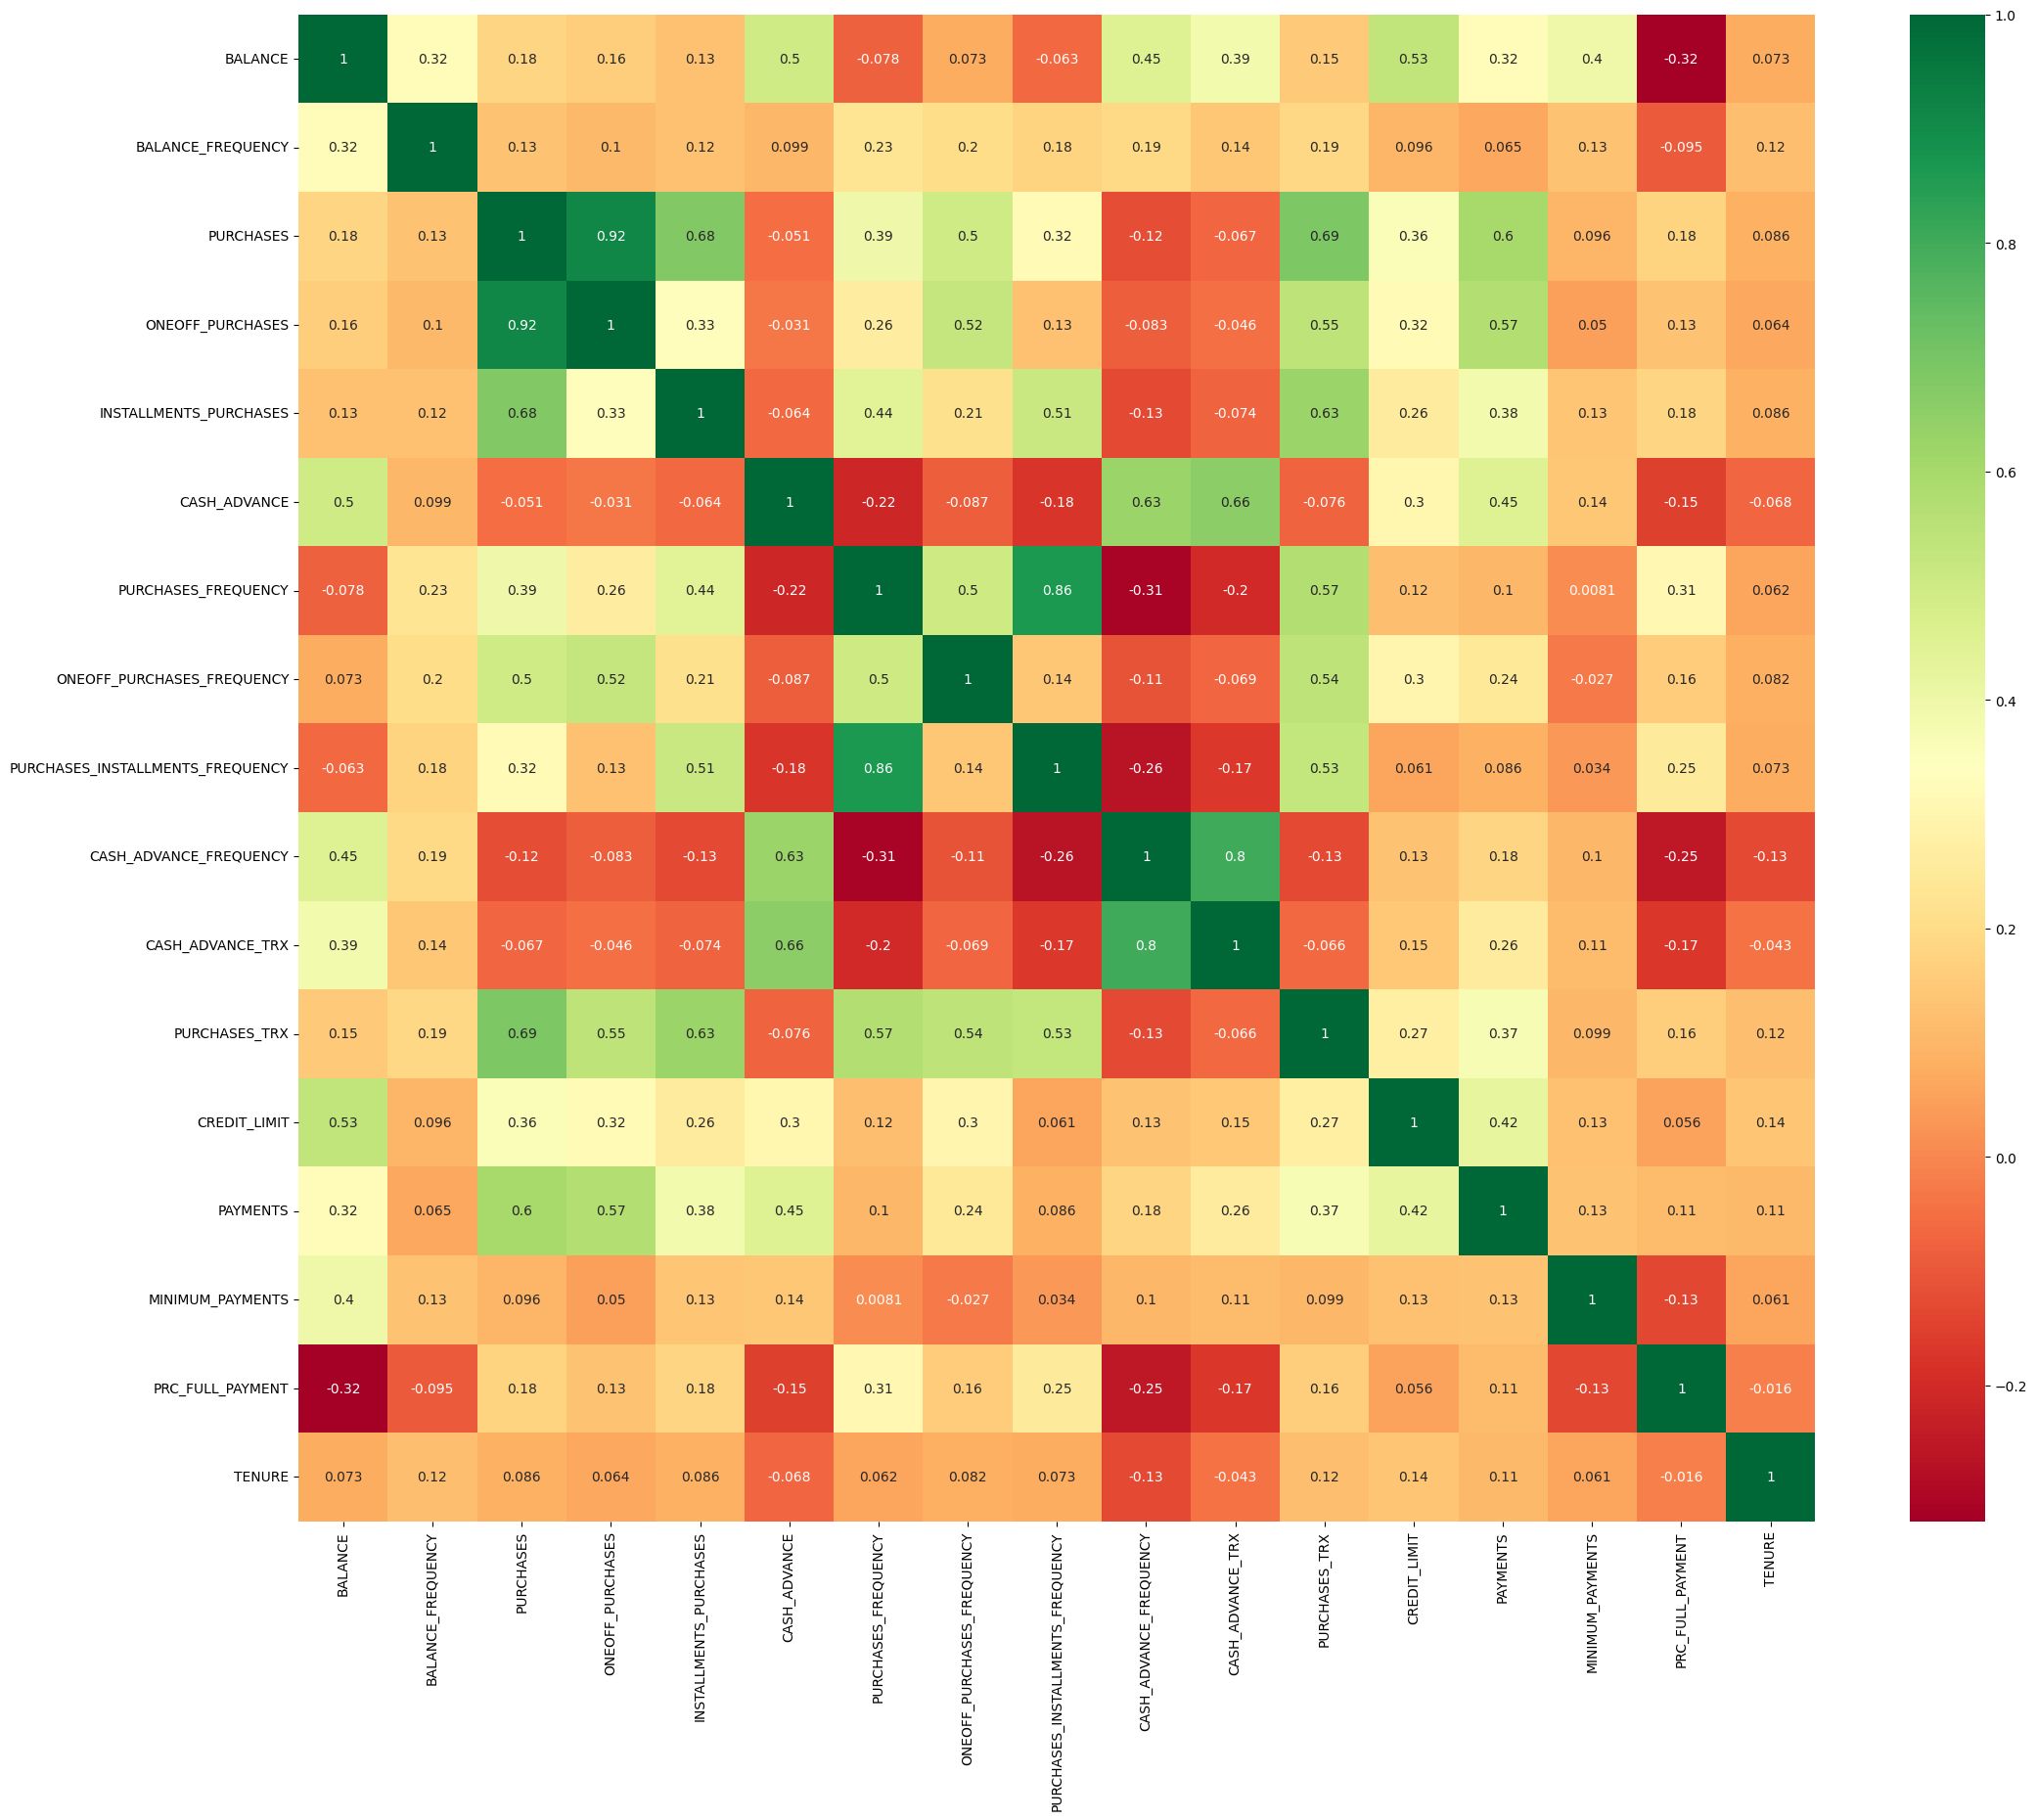

In [23]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'
correlations = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlations, annot=True,cmap="RdYlGn")

# FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD

In [24]:
# Let's scale the data first
scaler = StandardScaler()
normalized_df = scaler.fit_transform(df)
normalized_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.30040327,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09915834,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.09147338,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32485738,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.3362779 ,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.32234282,
        -0.52555097, -4.12276757]])

In [25]:
normalized_df.shape


(8950, 17)

In [26]:
# Compute 'within cluster sum of squares' or WCSS metric for a range of k clusters
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_df)
  wcss_values.append(kmeans.inertia_)

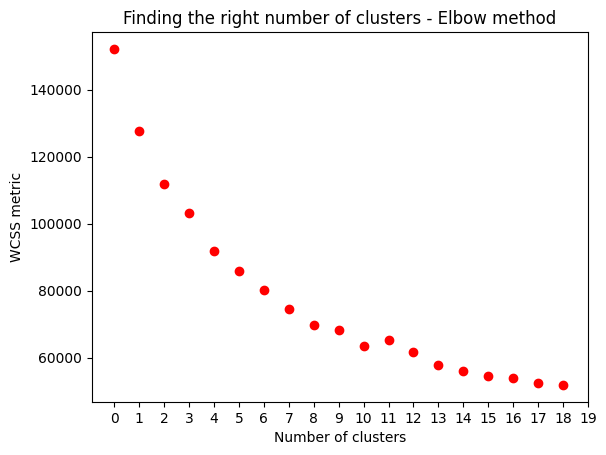

In [27]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS metric')
plt.title('Finding the right number of clusters - Elbow method')
plt.xticks(ticks=range(0,20))
plt.show()
# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 

Let's choose the number of clusters to be 7. Note that **scale starts with 0 which means we actually pick 8 clusters**

# APPLY K-MEANS METHOD

In [28]:
kmeans=KMeans(8)
kmeans.fit(normalized_df)
kmeans.cluster_centers_.shape

(8, 17)

we have 8 centroids with 17 coordinates corresponding to each features of the dataset

In [29]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])

In [30]:
labels = kmeans.labels_
labels

array([7, 2, 1, ..., 0, 0, 0], dtype=int32)

These are the cluster N° associated to each sample

In [31]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [32]:
labels.shape

(8950,)

In [33]:
# concatenate the clusters labels to our original dataframe
df_with_centroids = pd.concat([df, pd.DataFrame({'centroid':labels})], axis=1)
df_with_centroids     

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  centroid  
0      201.802084        139.509787          0.000000      12         7  
1     4103.032597       1072.340217          0.222222      12         2  
2      622.066742        627.284787          0.000000      12         1  
3        0.000000          0.000000          0.000000      12         7  
4      678.334763        244.791237          0.000000      12         7  
...           ...               ...               ...     ...       ...  
8945   325.594462         48.886365          0.500000       6       

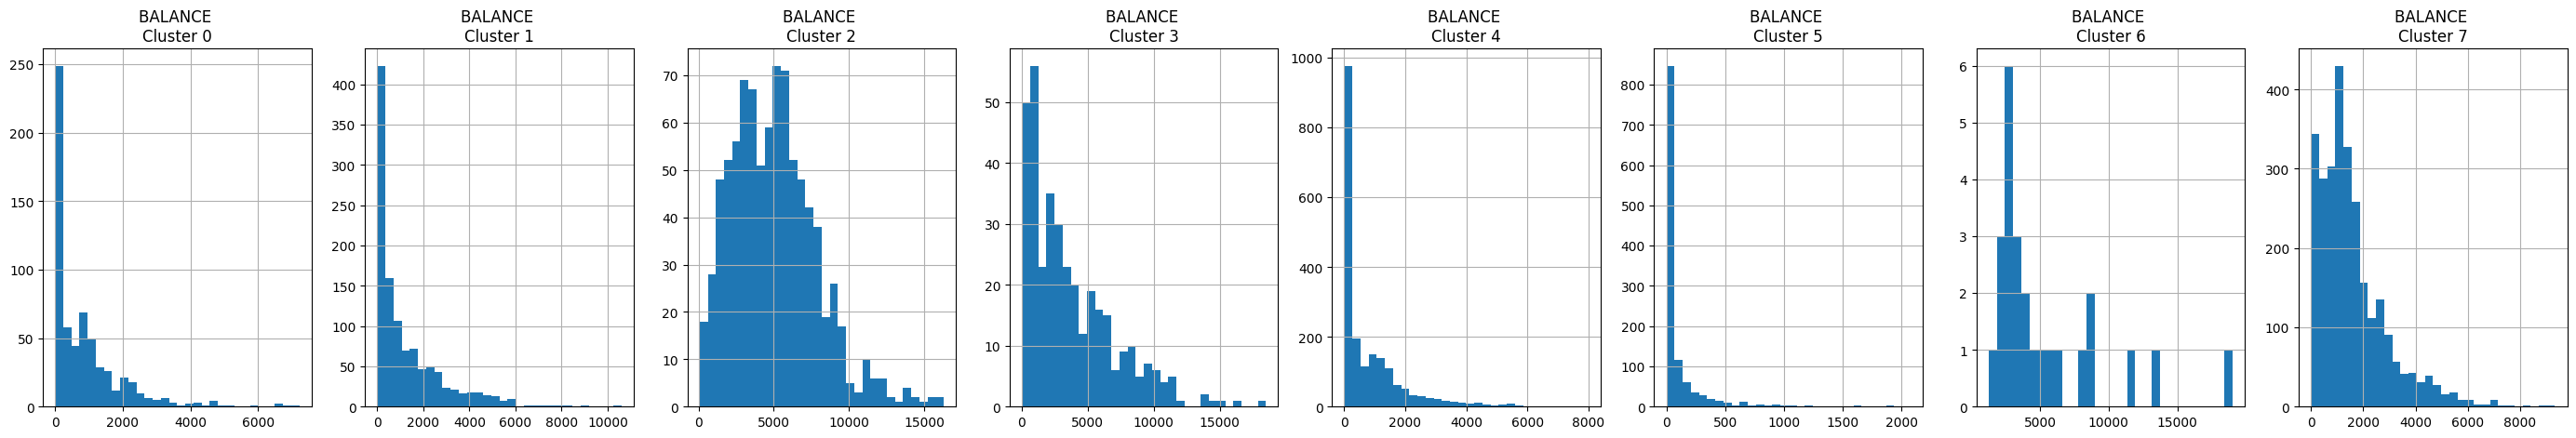

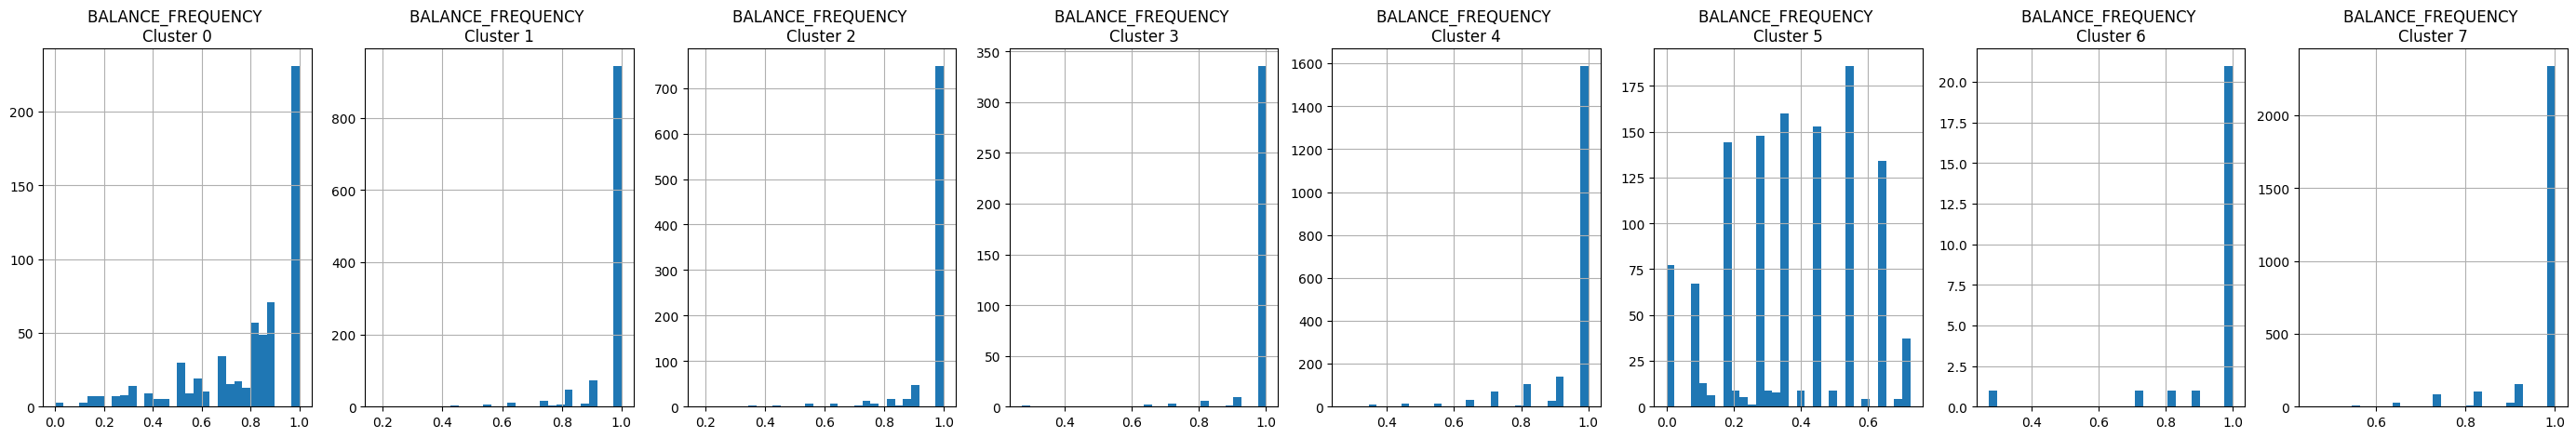

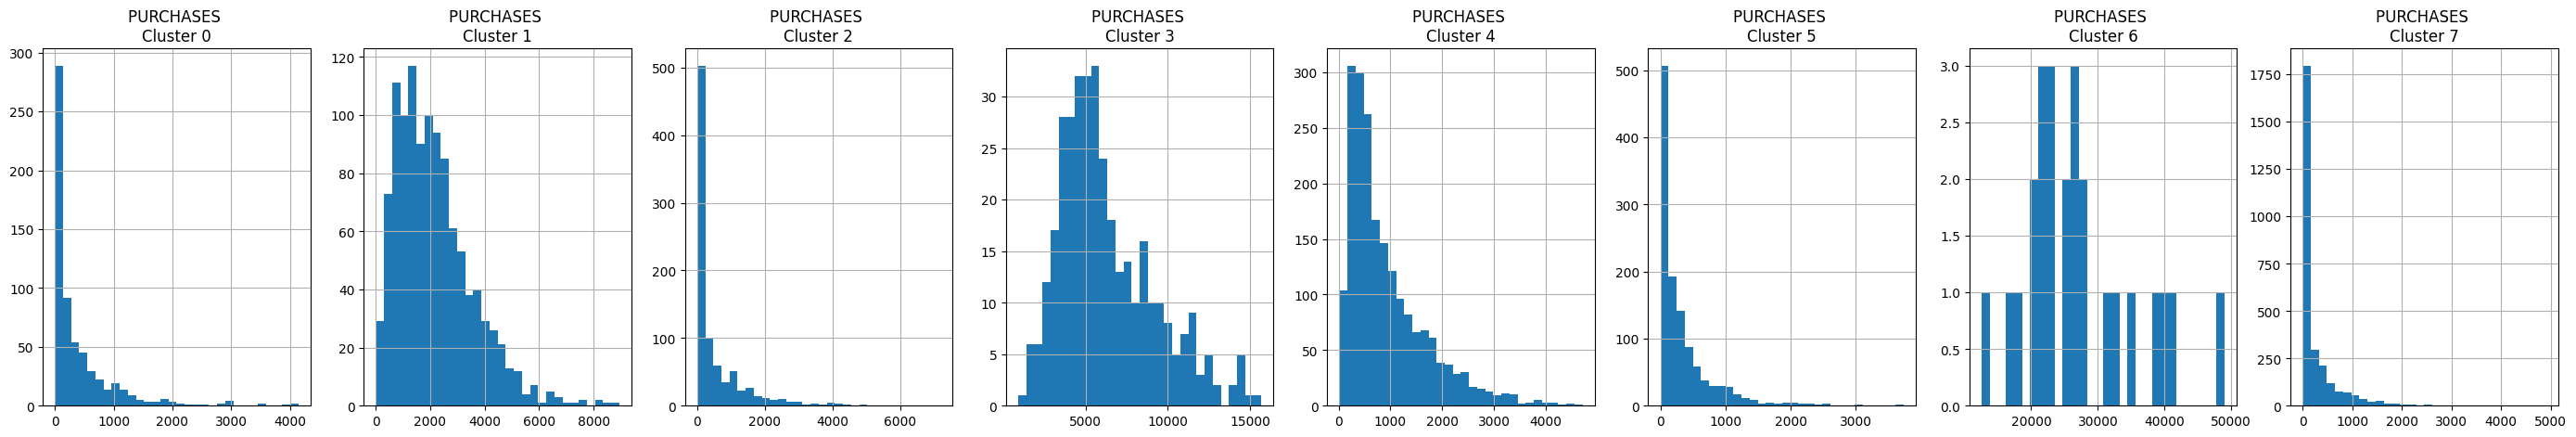

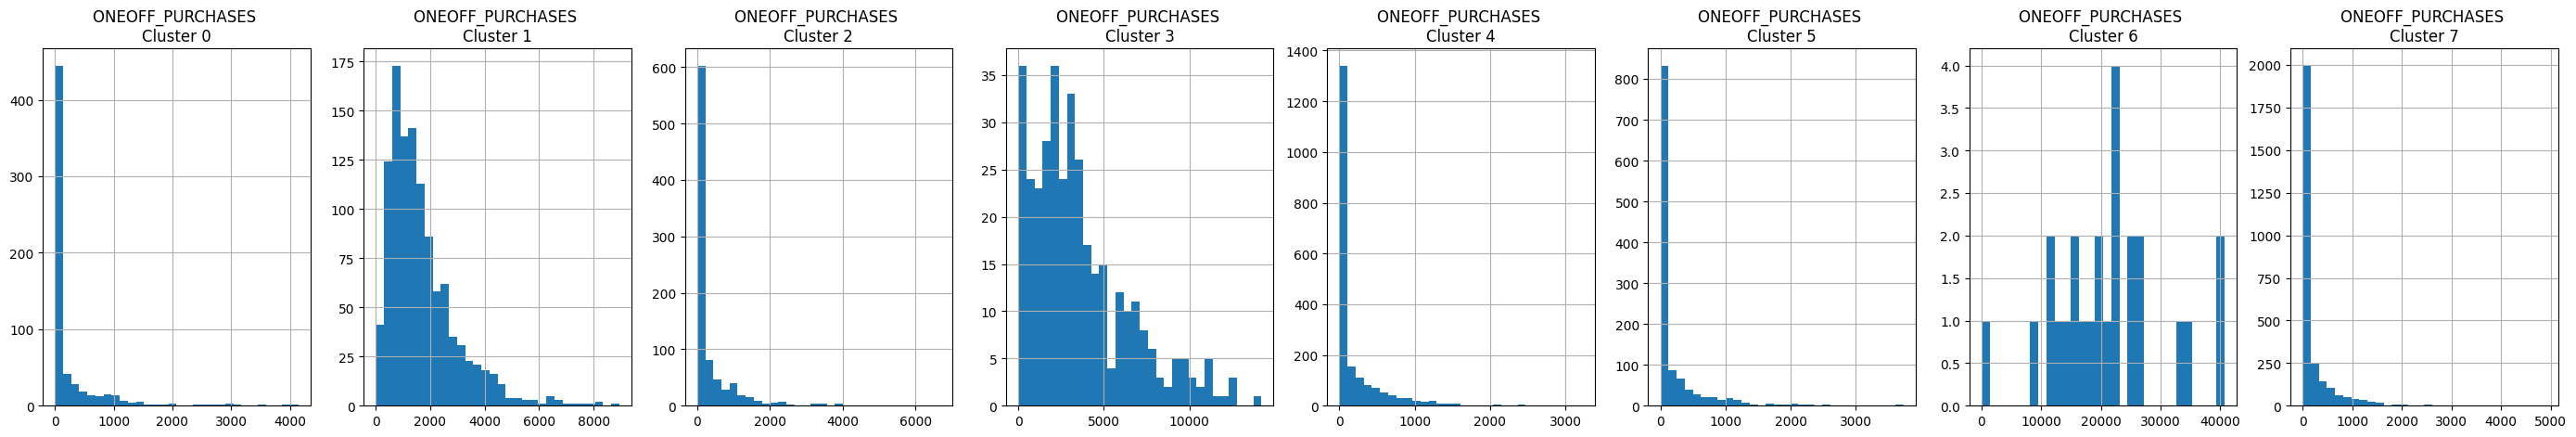

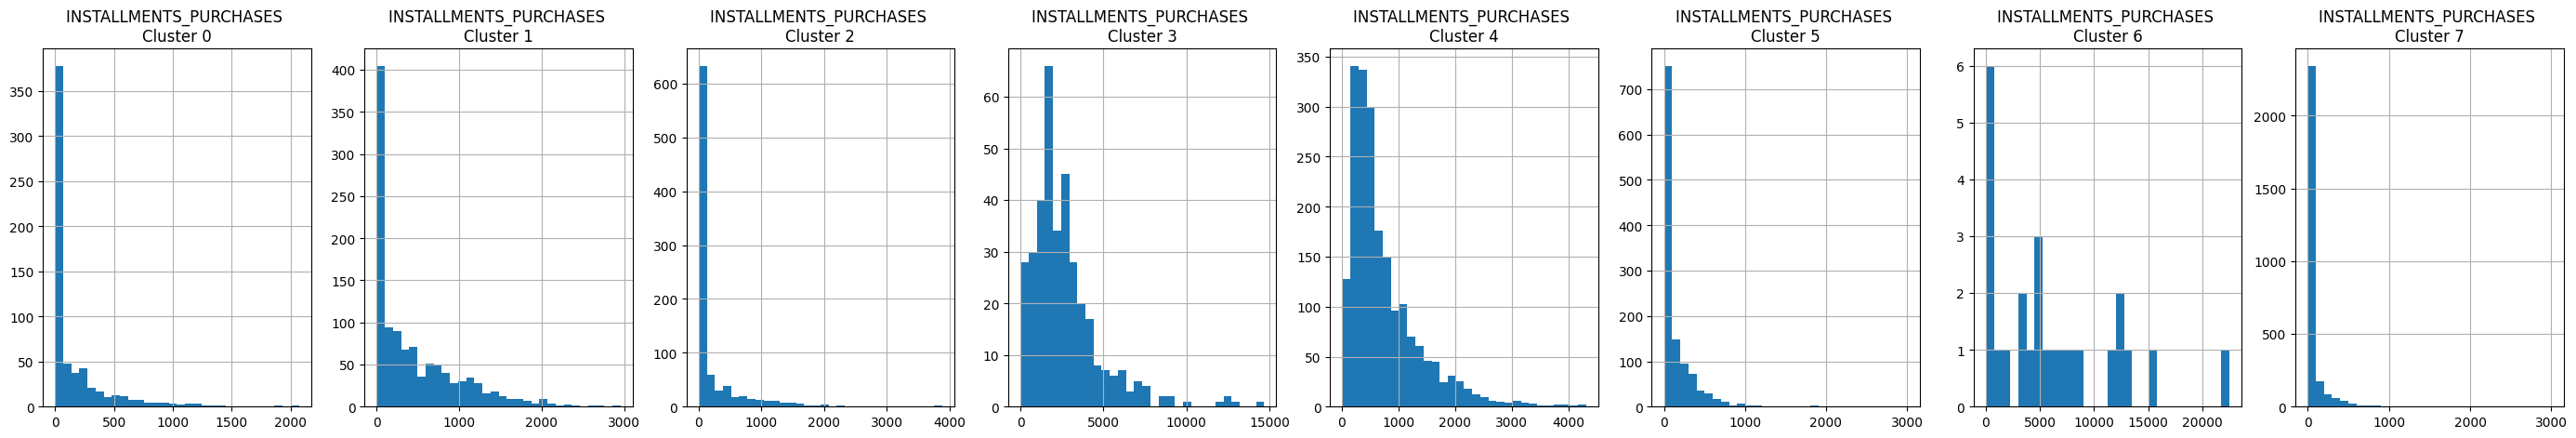

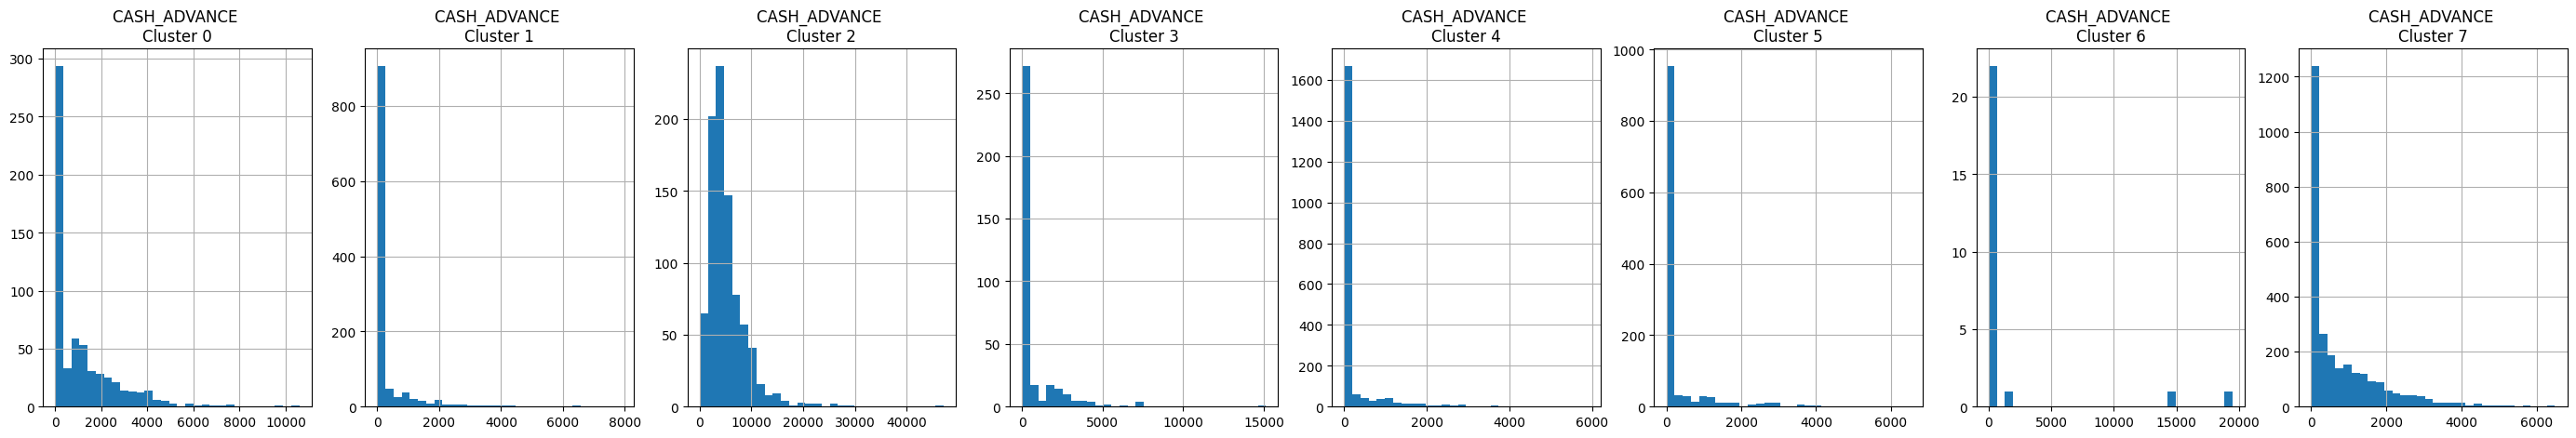

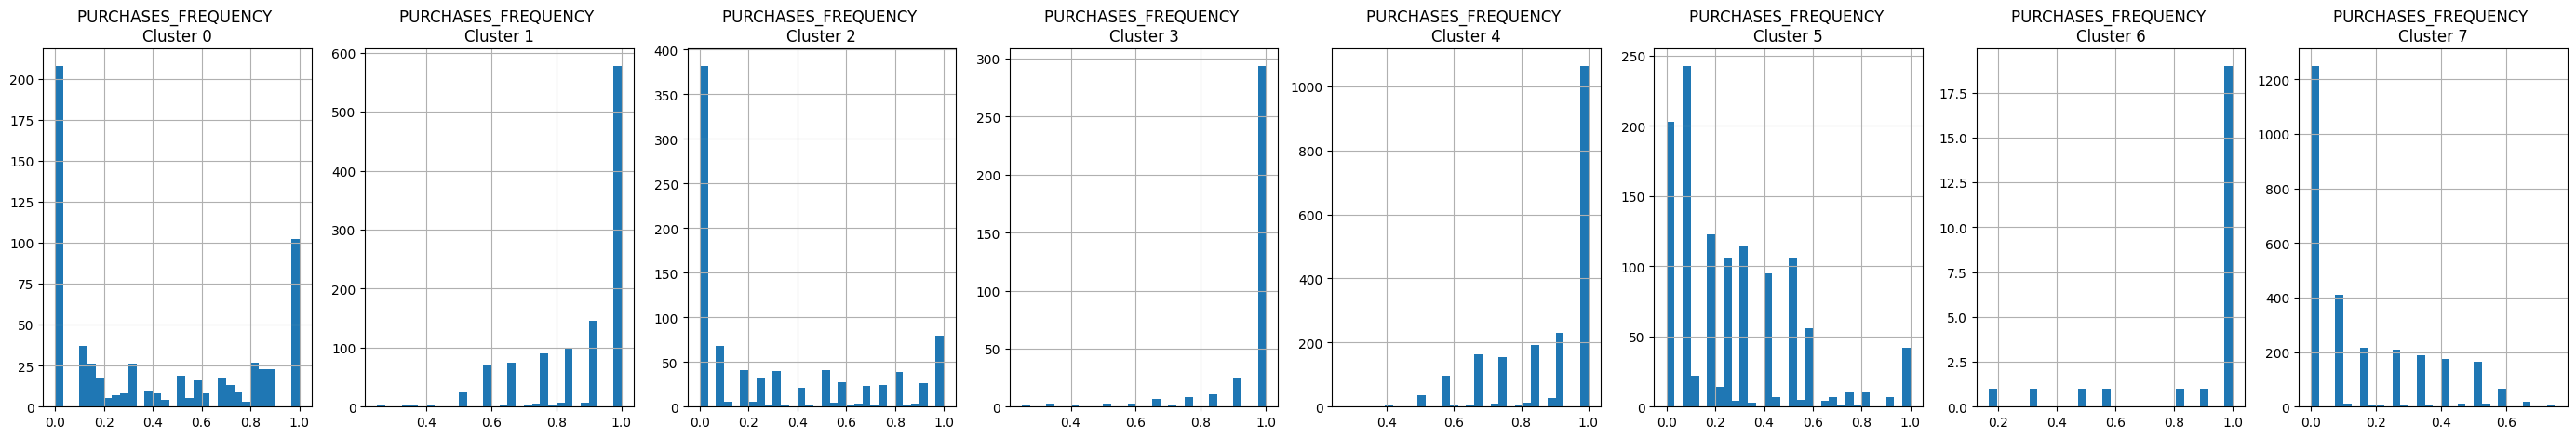

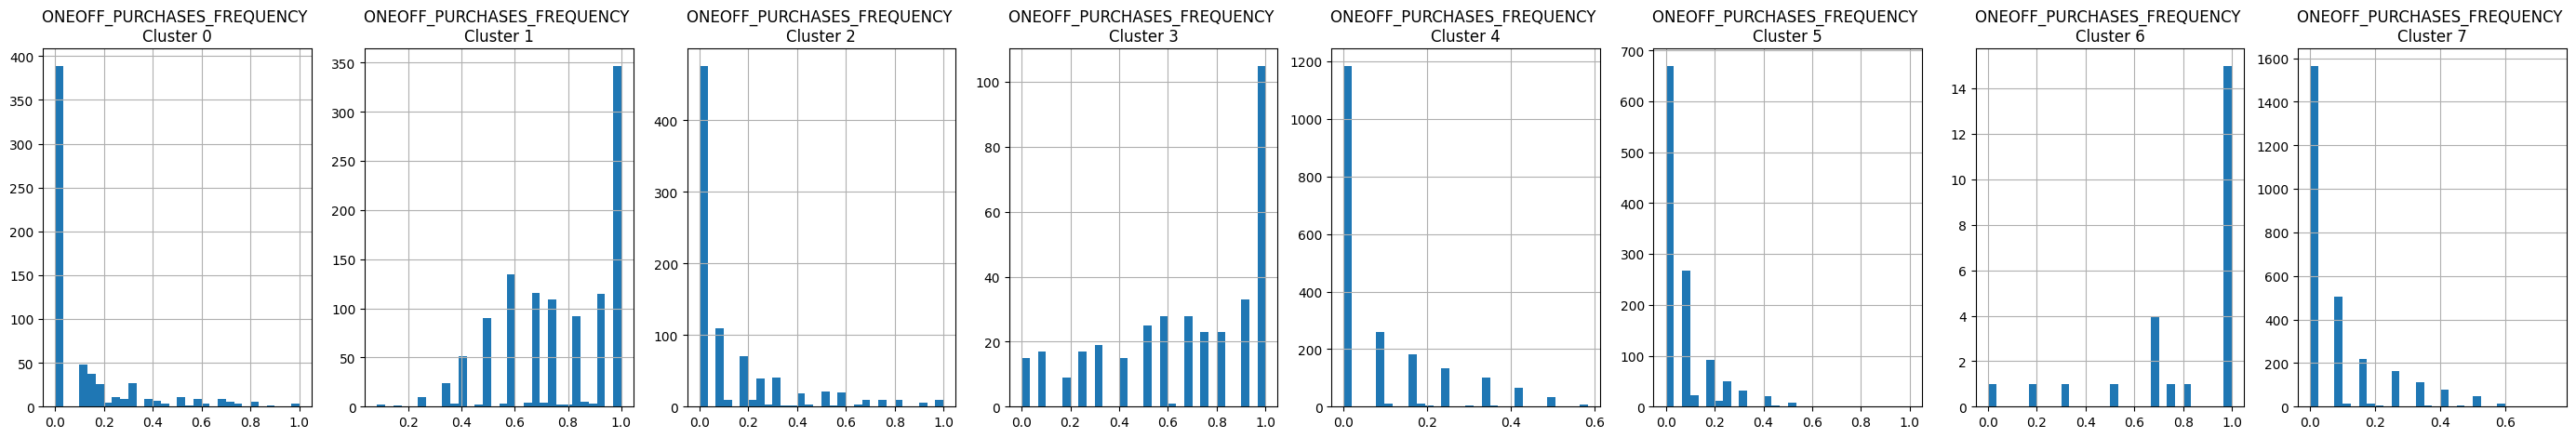

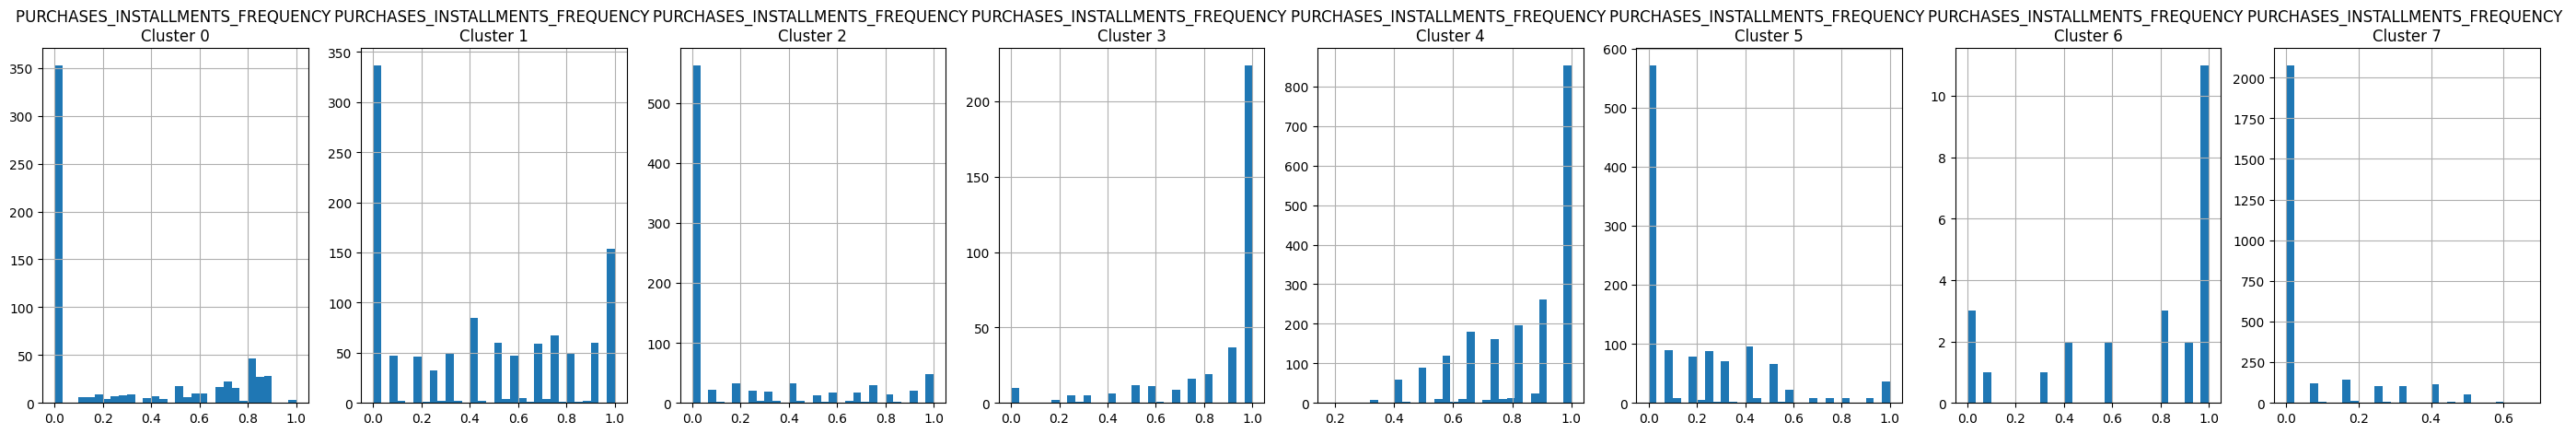

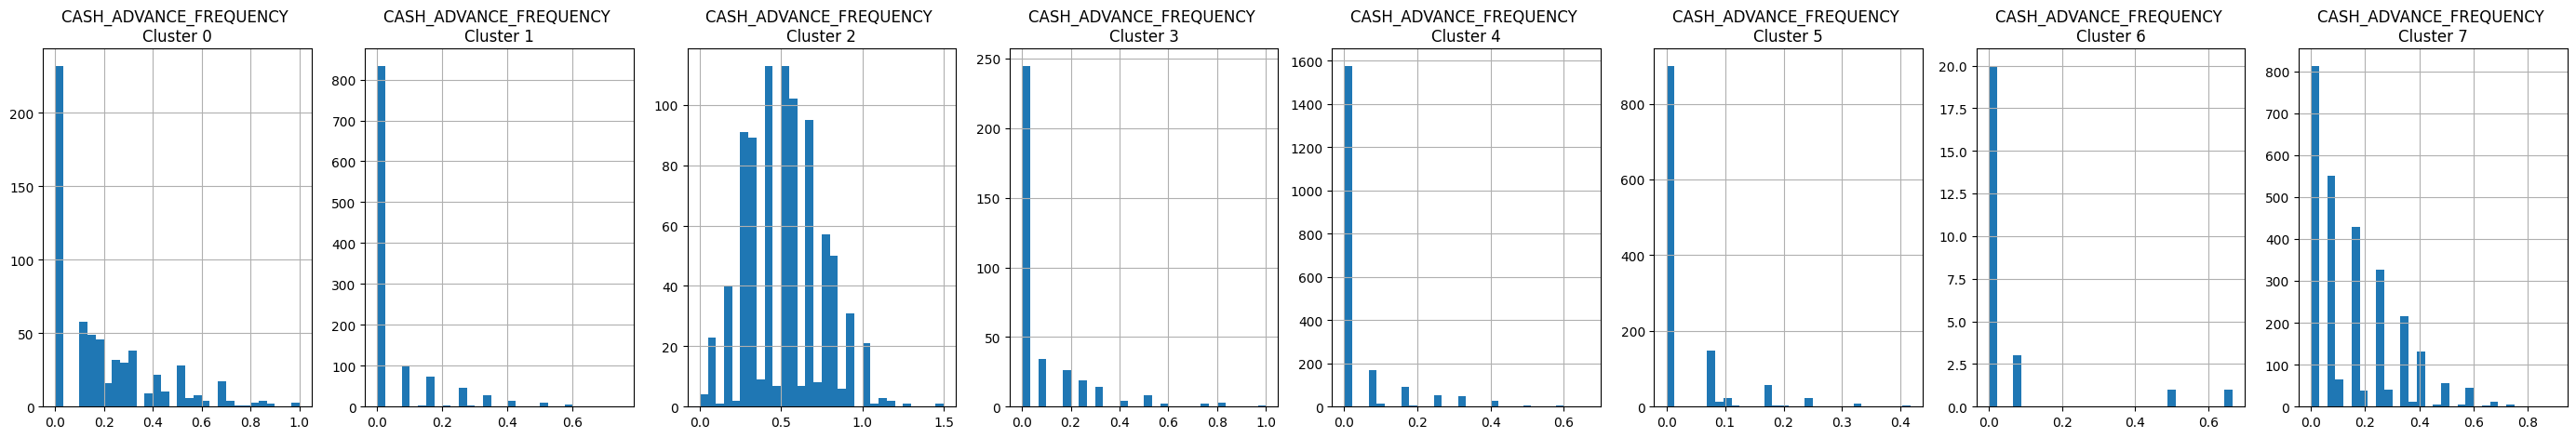

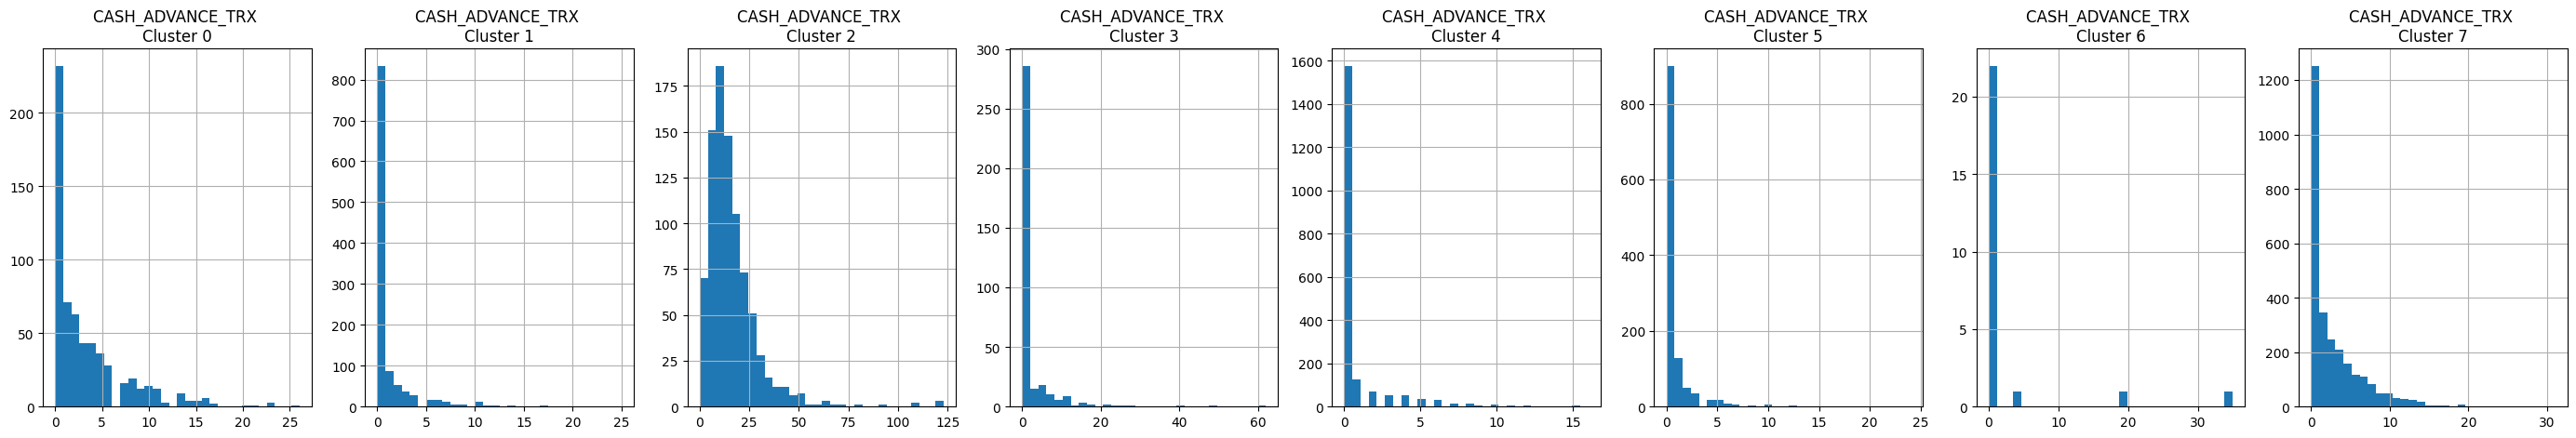

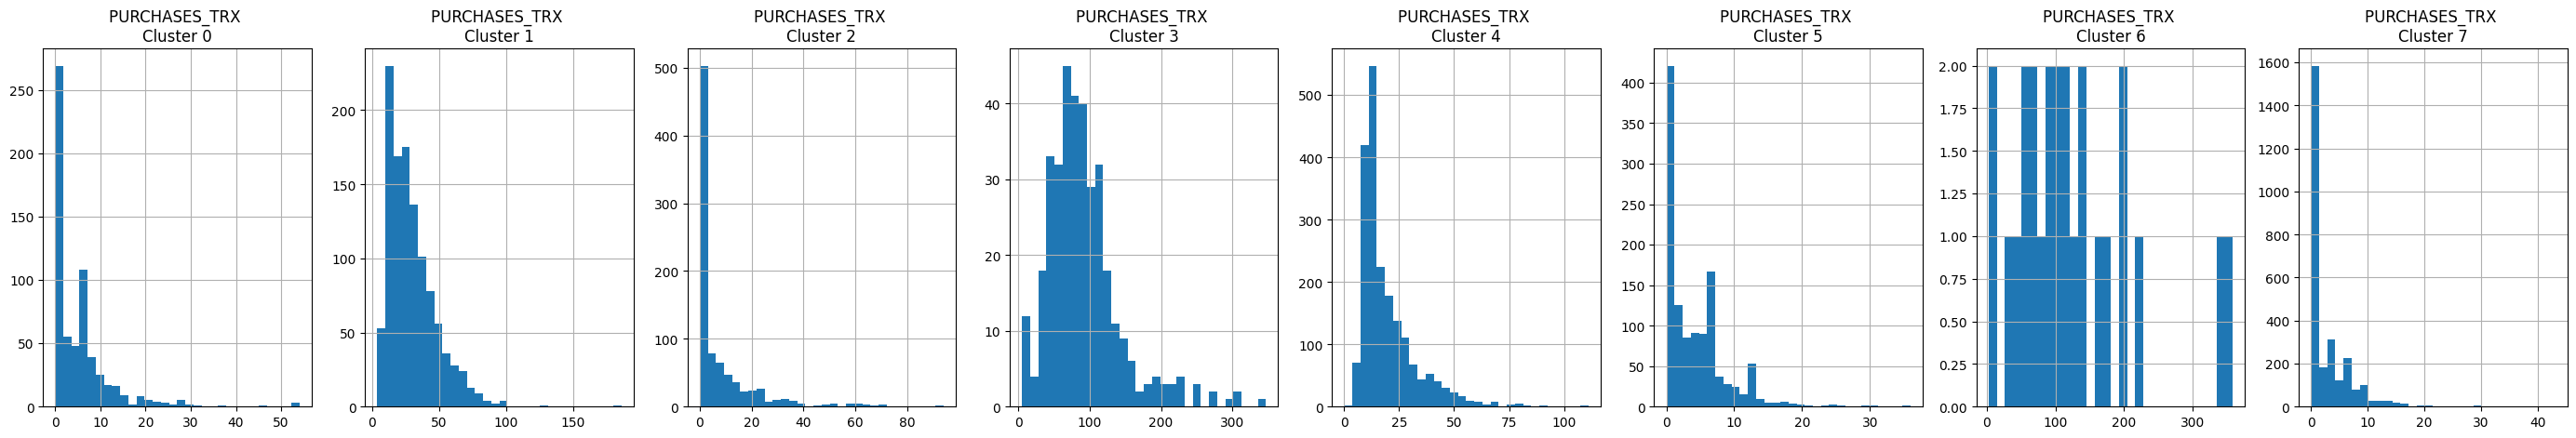

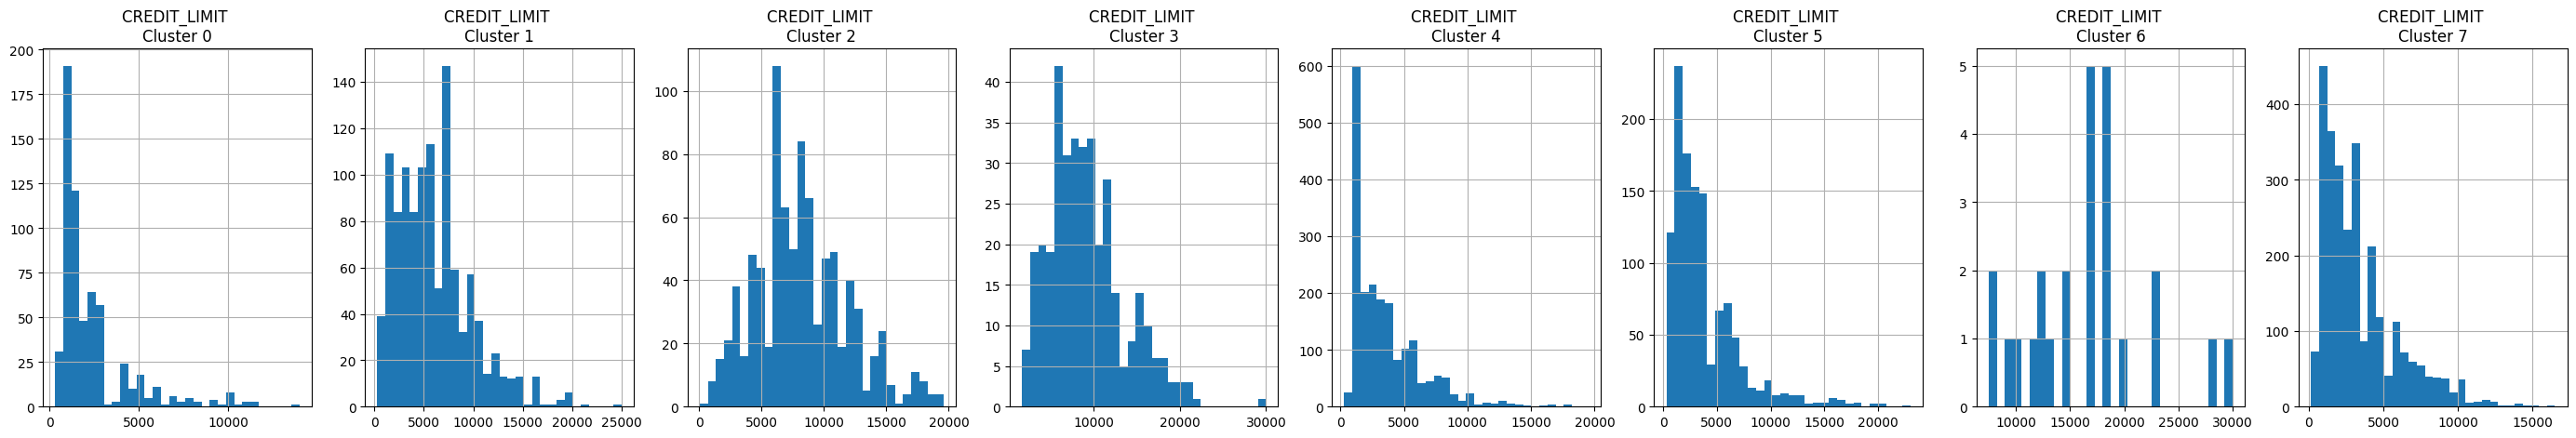

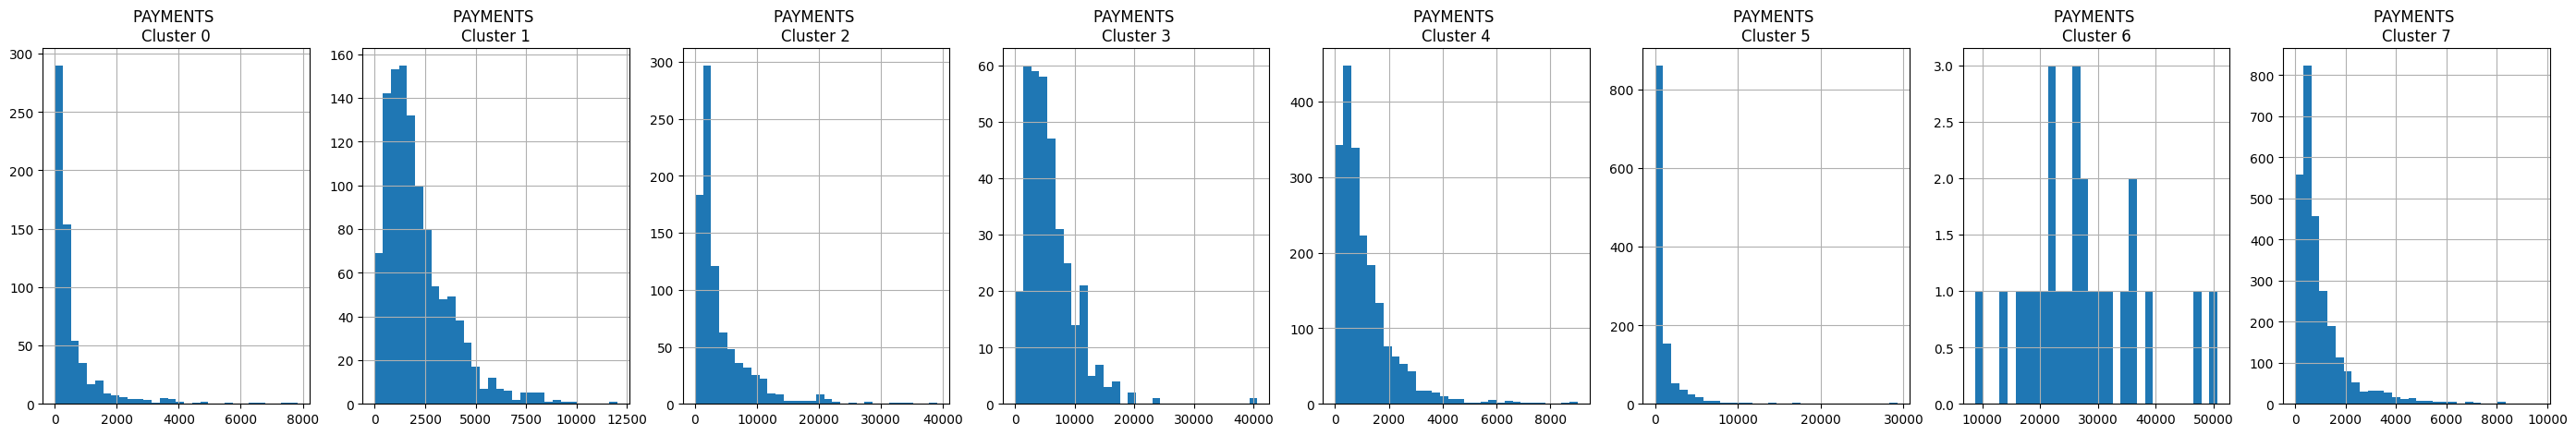

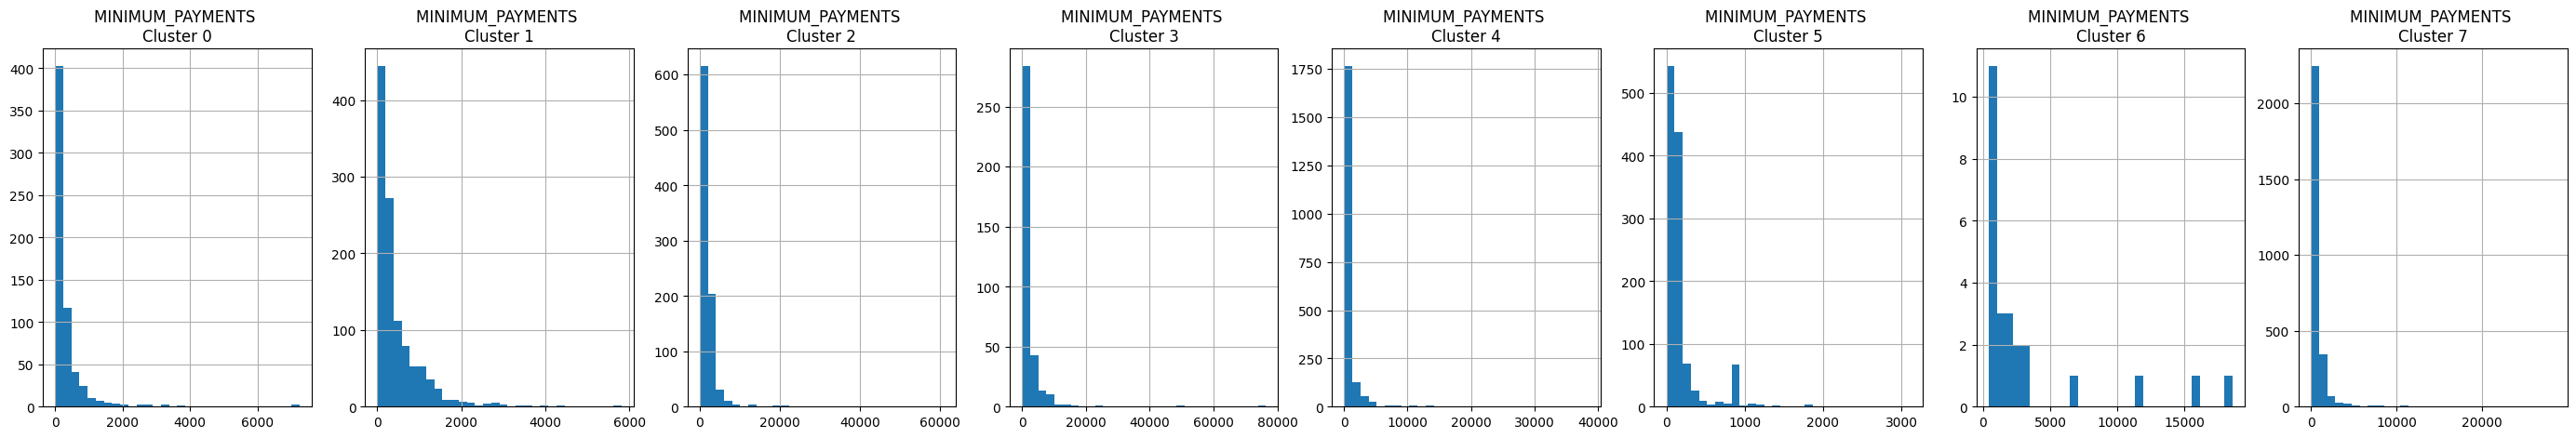

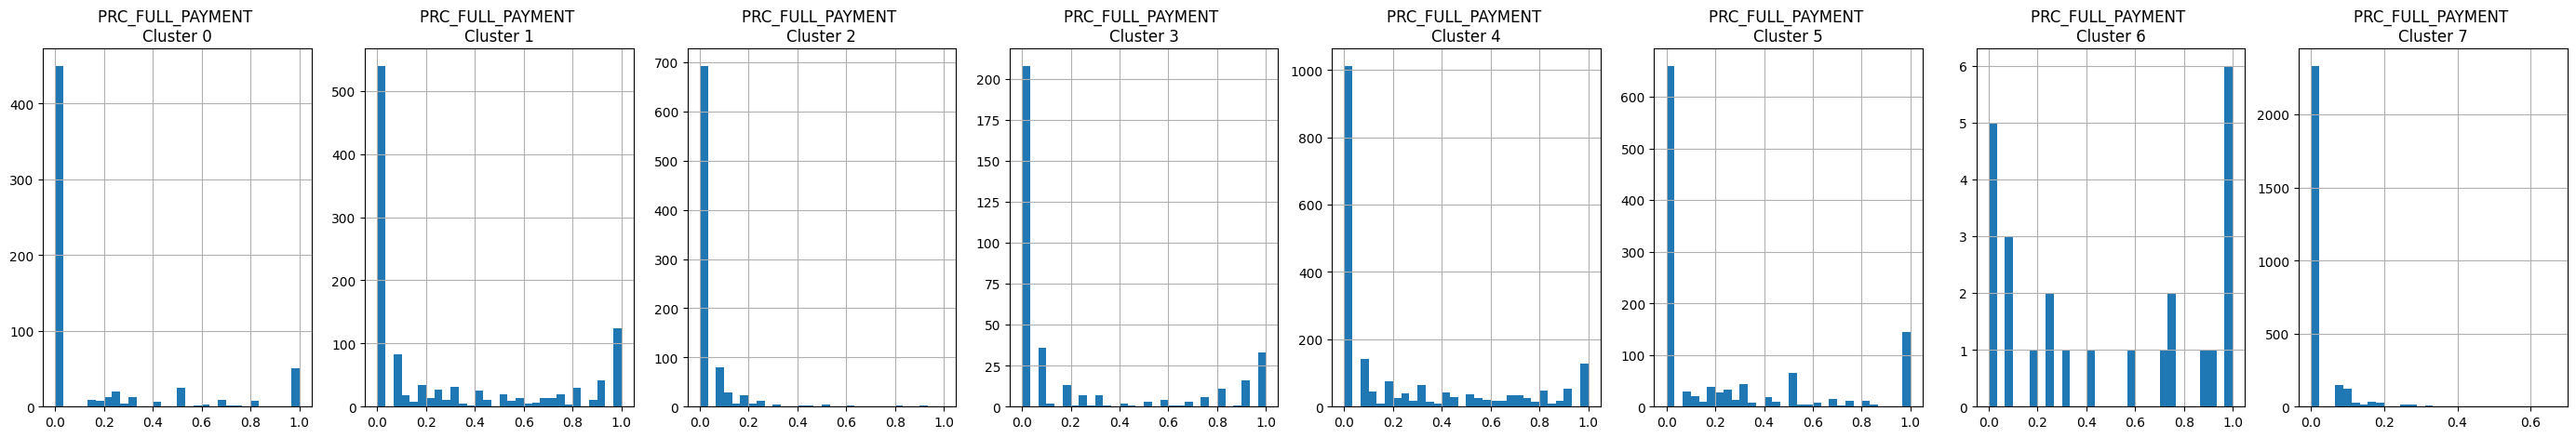

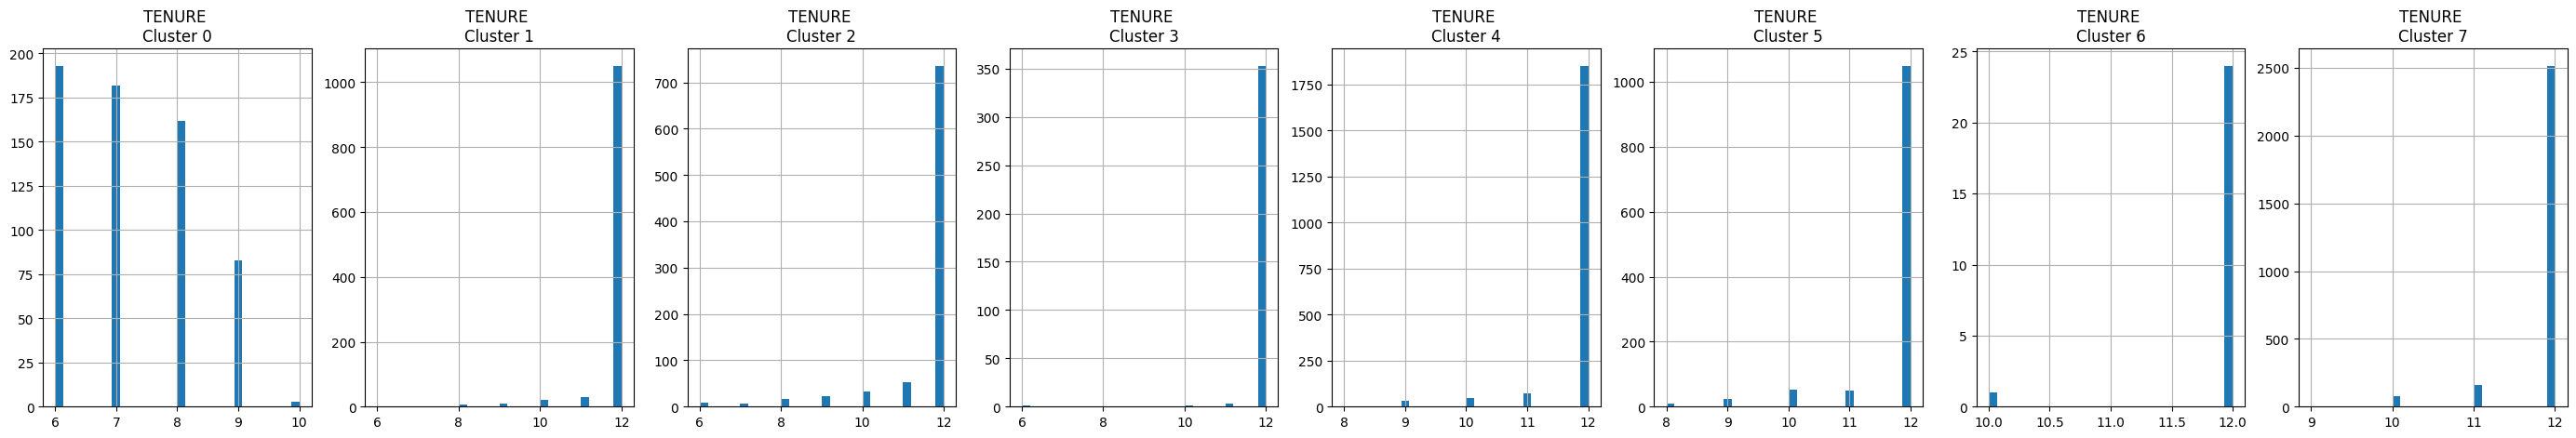

In [34]:
# Plot the histogram of various clusters (one cluster = one column with all features)
for feature in df.columns:
  plt.figure(figsize=(35,5))  
  for centroid in range(8):
    plt.subplot(1,8,centroid+1)
    cluster = df_with_centroids[df_with_centroids.centroid==centroid]
    cluster[feature].hist(bins=30)
    plt.title(f'{feature} \nCluster {centroid}')
plt.show()

In [35]:
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids.shape

(8, 17)

Plot the characteristics of the different clusters using their centroids
- This helps understading the different segments determined with Kmeans

In [36]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centroids = scaler.inverse_transform(cluster_centers)
cluster_centroids = pd.DataFrame(data=cluster_centroids, columns=[df.columns])
cluster_centroids
# first customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# second customers cluster (Credit purchasers) with high purchase frequency (0.9) who use payment installment facility the most (highest installment frequency 0.83), pay in full whenever possible (second highest Percentage of full payment = 25%) and do not use costly cash advance service
# Third customers cluster (Active cash buyers): Those are active buyers paying in full. Cluster with highest purchase frequency (0.93), second highest purchase transactions and one-off purchases, highest % of payment in full (29%)
# Fourth customer cluster (VIP/Prime): high credit limit $12K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fith customer cluster (low tenure): these are customers with low tenure (7 years), low balance
# Sixth Customers cluster (Transactors): Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance ($104) and second lowest cash advance ($303), Percentage of full payment = 24%
# Seventh customer cluster (one-off): Record-high minimum payments level of nearly 28k$
# Eighth customer cluster (Low activity): these are customers using the less their card (lowest purchase frequency) and with the lowest purchase amount
# note: cluster named by order not using index starting from 0

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0   864.645308          0.794979    388.085586       236.917416   
1  1277.919267          0.971958   2148.510027      1695.847536   
2  5059.597872          0.970199    530.609213       329.275678   
3  3738.793623          0.988040   6291.468603      3613.343464   
4   811.333806          0.956049    929.589980       189.472897   
5   105.310374          0.370180    339.832536       202.229949   
6  5351.546106          0.948727  27085.309200     21002.018800   
7  1585.484650          0.973061    241.808995       191.678548   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             151.649711  1120.263874            0.409393   
1             452.662491   282.157410            0.883543   
2             201.449464  5179.434096            0.299421   
3            2679.801117   653.097684            0.957030   
4             740.561722   217.302655            0.890435   
5             137.853474   303.051343            0.267672   
6            6083.290400  1488.363253            0.892667   
7              50.310076   776.226220            0.149166   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.117161                         0.275356   
1                   0.770588                         0.431800   
2                   0.140102                         0.198994   
3                   0.668935                         0.868063   
4                   0.087785                         0.845306   
5                   0.070409                         0.189773   
6                   0.808667                         0.708667   
7                   0.084837                         0.065637   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.196595         3.250401      5.077047   2443.040850   
1               0.052170         0.979464     30.025000   6057.970779   
2               0.517293        16.329532      8.029647   8215.512595   
3               0.079351         2.256983     92.089385   9189.385475   
4               0.040480         0.791439     19.460926   3545.878647   
5               0.030840         0.680473      4.287405   3860.811027   
6               0.056667         2.400000    123.320000  16360.000000   
7               0.155112         3.038475      2.758621   3384.234725   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0    596.072587       326.433806         0.157880   7.231140  
1   2141.110291       481.501273         0.285153  11.876786  
2   4099.820725      2140.052445         0.039452  11.611174  
3   5890.543674      2154.830041         0.225744  11.969274  
4   1111.703019       790.372892         0.246294  11.859632  
5   1148.908334       179.137163         0.235972  11.783601  
6  27159.043527      3201.825604         0.490758  11.920000  
7   1004.115174       818.440824         0.020462  11.884211

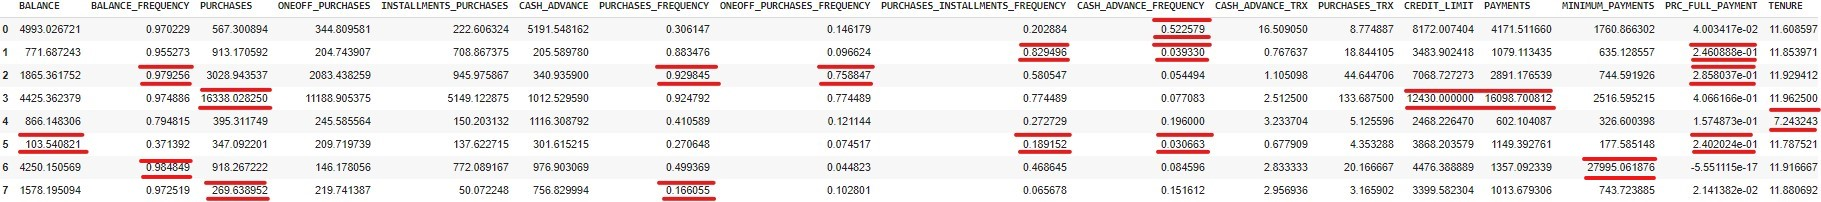

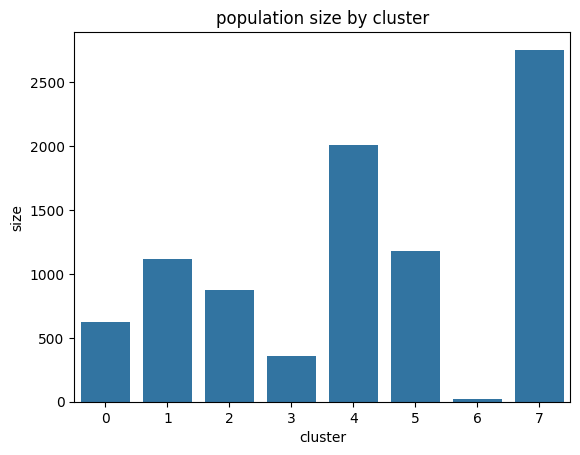

In [37]:
# Check size of each cluster - Are they all representative ?
cluster_size = []
for centroid, cluster_df in df_with_centroids.groupby("centroid"):
        cluster_size.append([centroid, len(cluster_df)])
cluster_sizes = pd.DataFrame(cluster_size, columns = ["cluster", "size"])
cluster_sizes.set_index("cluster", drop = True, inplace = True)
sns.barplot(x=cluster_sizes.index, y='size', data=cluster_sizes)
plt.title('population size by cluster')
plt.show()

- Clearly the two clusters 4 and 7 (above n°3 and 6 or "VIP/Prime" and "one-off") are extremely small and primarily represent some kind of exceptions. They may not constitute potential market segments within the current population
- the largest cluster represents the customer group with a limited purchase activity and a limited use of their card to make purchases.

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

In [38]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_df)
principal_components

array([[-1.68382972, -1.07153238],
       [-1.13349328,  2.50988238],
       [ 0.96924969, -0.38374739],
       ...,
       [-0.92933038, -1.80748939],
       [-2.33804508, -0.65282088],
       [-0.55830609, -0.40036107]])

In [39]:
# All samples projected on the two principal components
principal_components.shape

(8950, 2)

In [40]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(principal_components, columns=['pca1', 'pca2'])
pca_df.head()

pca1      pca2
0 -1.683830 -1.071532
1 -1.133493  2.509882
2  0.969250 -0.383747
3 -0.896865 -0.017535
4 -1.600116 -0.683147

In [41]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

pca1      pca2  cluster
0 -1.683830 -1.071532        7
1 -1.133493  2.509882        2
2  0.969250 -0.383747        1
3 -0.896865 -0.017535        7
4 -1.600116 -0.683147        7

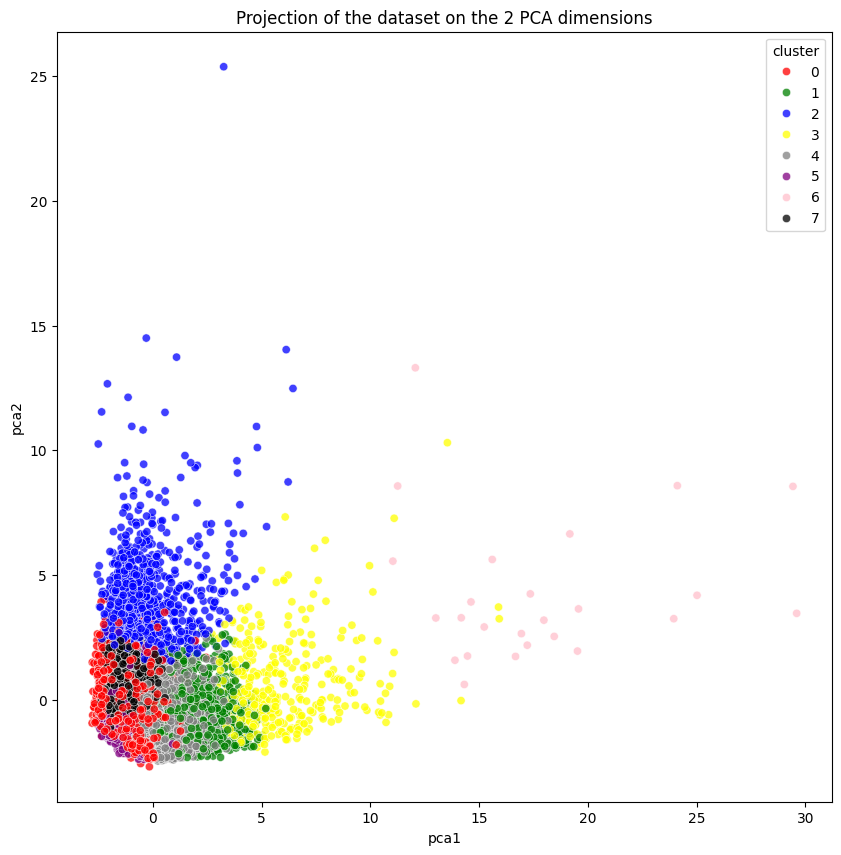

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2',hue = 'cluster', data = pca_df, palette=['red','green','blue','yellow','gray','purple','pink','black'], alpha=0.75)
plt.title('Projection of the dataset on the 2 PCA dimensions')
plt.show()

Our 2 small clusters are presented in pink and yellow. The largest, in black, is minimal in this new set of principal components.

In [43]:
# Principal axes in feature space, representing the directions of maximum variance in the data
pca.components_

array([[ 0.10182749,  0.12051558,  0.41154016,  0.34630896,  0.33675461,
        -0.0227429 ,  0.32120727,  0.29444838,  0.27448575, -0.08851103,
        -0.04806832,  0.39057938,  0.2119095 ,  0.26652633,  0.06395984,
         0.13178808,  0.08109728],
       [ 0.40378238,  0.13131902,  0.03988941,  0.06179915, -0.01927722,
         0.43908131, -0.19117965, -0.01867515, -0.17887071,  0.43420913,
         0.41972343, -0.02028658,  0.23795675,  0.25675524,  0.16865465,
        -0.19005732, -0.00423534]])

In [44]:
# % of the total variance explained by each principal component. Overall close to 48% explained by these two.
pca.explained_variance_ratio_

array([0.27299243, 0.20311671])

# AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [45]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform # Xavier's initialization
from keras.optimizers import SGD                         # Stochastic Gradient Descent

In [46]:
input_df = Input(shape=(17,))  # The 17 features of our dataset
# Encoder
x = Dense(units=7, activation='relu')(input_df)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(x)
# Bottleneck
encoded = Dense(units=10, activation='relu', kernel_initializer='glorot_uniform')(x)
# Decoder
x = Dense(units=2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(units=500, activation='relu', kernel_initializer='glorot_uniform')(x)
# we reconstruct the same number of features as the input
decoded = Dense(units=17, kernel_initializer='glorot_uniform')(x)   

# Autoencoder
autoencoder = Model(input_df, decoded)
# Encoder
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2000)           │     1,002,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        20,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2000)           │        22,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │     1,000,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 17)             │         8,517 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,307,653 (8.80 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
normalized_df.shape

(8950, 17)

**Train autoencoder using input = output**

In [49]:
autoencoder.fit(x= normalized_df, y= normalized_df, batch_size=128, epochs=25,verbose=1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.7413
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3956
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2292
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2116
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1633
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1622
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1321
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1248
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1175
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.1076
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1196
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0983
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0905
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0930
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0836
Epoc

In [50]:
# Use Autoencoder to reduce the number of features / dimensions
pred = encoder.predict(normalized_df)
pred.shape

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(8950, 10)

The dataset is reduced from 17 features (or dimensions) to 10 using trained autoencoder which should retain as much information as possible in the process

## Apply KMEANS to encoded dataset

In [51]:
wcss_values_autoencoder = []
for i in range(1,20):
  kmeans= KMeans(n_clusters= i)
  kmeans.fit(pred)
  wcss_values_autoencoder.append(kmeans.inertia_)

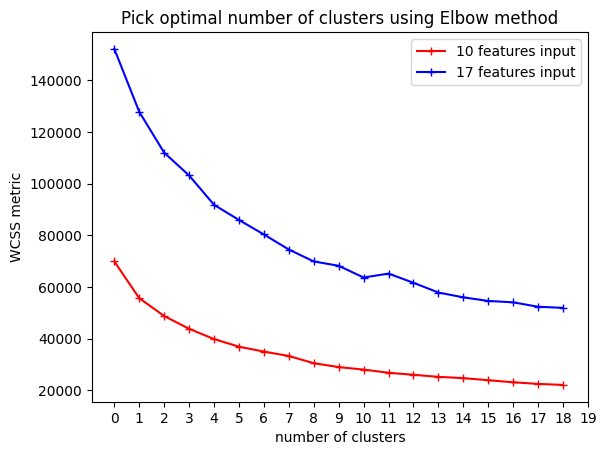

In [52]:
plt.plot(wcss_values_autoencoder, 'r+-', label='10 features input')
plt.plot(wcss_values, 'b+-', label='17 features input')
plt.xlabel('number of clusters')
plt.ylabel('WCSS metric')
plt.title('Pick optimal number of clusters using Elbow method')
plt.xticks(ticks=range(0,20))
plt.legend()
plt.show()

Let's use 5 clusters

In [53]:
kmeans= KMeans(5)
kmeans.fit(pred)
centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

In [54]:
centroids.shape

(5, 10)

In [55]:
clusters.shape

(8950,)

In [56]:
set(clusters)

{0, 1, 2, 3, 4}

In [57]:
df_with_labels = pd.concat([df, pd.DataFrame({'cluster':clusters})], axis=1 )
df_with_labels.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        0  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000          0.000000          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

In [58]:
print('Number of samples in:')
for cluster, df_cluster in df_with_labels.groupby('cluster'):
  print('cluster', cluster, '->',len(df_cluster))

Number of samples in:
cluster 0 -> 727
cluster 1 -> 5120
cluster 2 -> 2121
cluster 3 -> 99
cluster 4 -> 883


## Apply PCA to encoded dataset

In [59]:
pca = PCA(2)
principal_components = pca.fit_transform(pred)
pca_df = pd.DataFrame(principal_components,columns=['pca_1', 'pca_2'])
pca_df.head()

pca_1     pca_2
0 -1.417553 -0.388131
1  1.885301 -1.167385
2 -0.221621  0.559362
3 -0.380493 -0.443451
4 -1.555941 -0.392103

In [60]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':clusters})], axis=1)
pca_df.head()

pca_1     pca_2  cluster
0 -1.417553 -0.388131        1
1  1.885301 -1.167385        0
2 -0.221621  0.559362        1
3 -0.380493 -0.443451        1
4 -1.555941 -0.392103        1

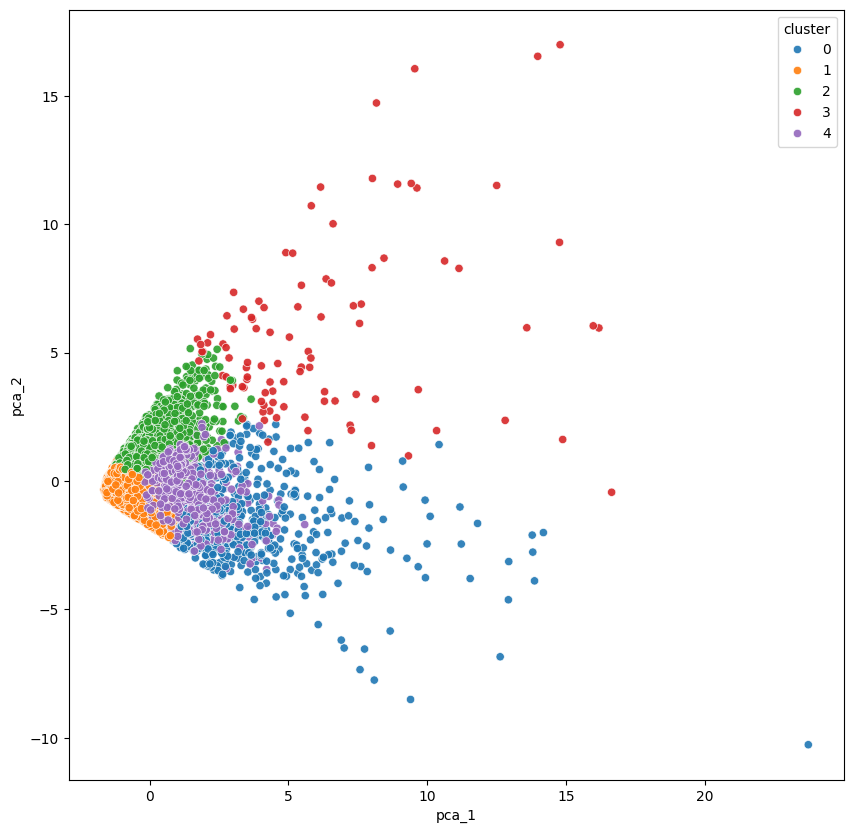

In [61]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca_1', y='pca_2', data=pca_df, hue='cluster', palette='tab10', alpha=0.9)  # or 'Spectral' color palette
plt.show()

In [62]:
pca.explained_variance_ratio_

array([0.3493276 , 0.22235374], dtype=float32)

In [63]:
print(f'PCA still explains {round(pca.explained_variance_ratio_.sum()*100,0)}% of the total variance from the encoder output')

PCA still explains 57.0% of the total variance from the encoder output
